Data Cleaning and Preparation

In [160]:
import pandas as pd
import numpy as np


df = pd.read_csv(r'C:\datasets\supermarketsales.csv')
print(df.columns)

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


In [161]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [162]:
df.count()

Invoice ID                 1000
Branch                     1000
City                       1000
Customer type              1000
Gender                     1000
Product line               1000
Unit price                 1000
Quantity                   1000
Tax 5%                     1000
Total                      1000
Date                       1000
Time                       1000
Payment                    1000
cogs                       1000
gross margin percentage    1000
gross income               1000
Rating                     1000
dtype: int64

1) Implement a step-by-step approach for handling missing values, outliers, and duplicates in the given dataset, emphasizing the application of data mining principles.

1.1) Missing Values

In [163]:

missing_values = df.isnull().sum()
print(missing_values)

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


1.2) Standardize Categorical Data

In [164]:

duplicates = df[df.duplicated()]
if not duplicates.empty:
    print("Duplicate rows found:\n", duplicates)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [165]:
z_threshold = 2
numeric_columns = df.select_dtypes(include=np.number).columns

for column in numeric_columns:
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    outliers = df[z_scores > z_threshold]

    if not outliers.empty:
        print(f"Outliers found in column '{column}':\n", outliers)
        df = df[~(z_scores > z_threshold)]
    else:
        print(f"No outliers found in column '{column}'.")

print("DataFrame after removing rows with outliers:\n", df)

No outliers found in column 'Unit price'.
No outliers found in column 'Quantity'.
Outliers found in column 'Tax 5%':
       Invoice ID Branch       City Customer type  Gender   
43   228-96-1411      C  Naypyitaw        Member  Female  \
49   574-22-5561      C  Naypyitaw        Member  Female   
68   232-11-3025      A     Yangon        Normal    Male   
70   393-65-2792      C  Naypyitaw        Normal    Male   
78   829-49-1914      C  Naypyitaw        Member  Female   
96   766-85-7061      B   Mandalay        Normal    Male   
105  704-48-3927      A     Yangon        Member    Male   
109  861-77-0145      C  Naypyitaw        Member    Male   
120  638-60-7125      A     Yangon        Normal  Female   
122  219-22-9386      B   Mandalay        Member    Male   
129  549-84-7482      B   Mandalay        Normal  Female   
140  731-81-9469      C  Naypyitaw        Member  Female   
141  280-17-4359      C  Naypyitaw        Member    Male   
158  743-04-1105      B   Mandalay        

In [166]:
print("DataFrame after removing rows with outliers:\n")
df

DataFrame after removing rows with outliers:



,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.7450,183.6450,2/22/2019,18:35,Ewallet,174.90,4.761905,8.7450,6.6
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2/18/2019,11:40,Ewallet,60.95,4.761905,3.0475,5.9
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7


In [167]:
df.count()

Invoice ID                 822
Branch                     822
City                       822
Customer type              822
Gender                     822
Product line               822
Unit price                 822
Quantity                   822
Tax 5%                     822
Total                      822
Date                       822
Time                       822
Payment                    822
cogs                       822
gross margin percentage    822
gross income               822
Rating                     822
dtype: int64

In [168]:

df['Gender'] = df['Gender'].str.title()

categorical_columns = ['Branch', 'City',
                       'Customer type', 'Product line', 'Payment']
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Branch': ['A' 'C' 'B']
Unique values in 'City': ['Yangon' 'Naypyitaw' 'Mandalay']
Unique values in 'Customer type': ['Member' 'Normal']
Unique values in 'Product line': ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Food and beverages' 'Fashion accessories' 'Sports and travel']
Unique values in 'Payment': ['Ewallet' 'Cash' 'Credit card']


Step 1.2 continued

In [169]:

print("\nData types before conversion:")
print(df.dtypes)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])

df = df.drop(['Date', 'Time'], axis=1)
df.head(), df.dtypes


Data types before conversion:
Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


(    Invoice ID Branch       City Customer type  Gender   
 0  750-67-8428      A     Yangon        Member  Female  \
 1  226-31-3081      C  Naypyitaw        Normal  Female   
 2  631-41-3108      A     Yangon        Normal    Male   
 3  123-19-1176      A     Yangon        Member    Male   
 6  355-53-5943      A     Yangon        Member  Female   
 
              Product line  Unit price  Quantity   Tax 5%     Total   
 0       Health and beauty       74.69         7  26.1415  548.9715  \
 1  Electronic accessories       15.28         5   3.8200   80.2200   
 2      Home and lifestyle       46.33         7  16.2155  340.5255   
 3       Health and beauty       58.22         8  23.2880  489.0480   
 6  Electronic accessories       68.84         6  20.6520  433.6920   
 
        Payment    cogs  gross margin percentage  gross income  Rating   
 0      Ewallet  522.83                 4.761905       26.1415     9.1  \
 1         Cash   76.40                 4.761905        3.8200     9

1.3) Dealing with Obvious Errors

In [170]:

numerical_columns = ['Unit price', 'Quantity',
                     'Tax 5%', 'Total', 'cogs', 'gross income']
negative_values = {column: df[df[column] < 0]
                   [column].count() for column in numerical_columns}
negative_values

{'Unit price': 0,
 'Quantity': 0,
 'Tax 5%': 0,
 'Total': 0,
 'cogs': 0,
 'gross income': 0}

2) Converting categorical data into a format suitable for data mining analysis

In [171]:

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


unique_genders = df['Gender'].unique()
print(f"\nUnique values in 'Gender': {unique_genders}")

one_hot_encoded_df = pd.get_dummies(
    df, columns=['Branch', 'City', 'Customer type', 'Product line', 'Payment', 'Gender'])

one_hot_encoded_df.head()



Unique values in 'Branch': ['A' 'C' 'B']
Unique values in 'City': ['Yangon' 'Naypyitaw' 'Mandalay']
Unique values in 'Customer type': ['Member' 'Normal']
Unique values in 'Product line': ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Food and beverages' 'Fashion accessories' 'Sports and travel']
Unique values in 'Payment': ['Ewallet' 'Cash' 'Credit card']

Unique values in 'Gender': ['Female' 'Male']


,Invoice ID,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Datetime,...,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet,Gender_Female,Gender_Male
0,750-67-8428,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,2019-01-05 13:08:00,...,False,False,True,False,False,False,False,True,True,False
1,226-31-3081,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,2019-03-08 10:29:00,...,False,False,False,False,False,True,False,False,True,False
2,631-41-3108,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,2019-03-03 13:23:00,...,False,False,False,True,False,False,True,False,False,True
3,123-19-1176,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,2019-01-27 20:33:00,...,False,False,True,False,False,False,False,True,False,True
6,355-53-5943,68.84,6,20.6520,433.6920,413.04,4.761905,20.6520,5.8,2019-02-25 14:36:00,...,False,False,False,False,False,False,False,True,True,False


3) Apply normalization or scaling to numerical features in the dataset as needed

In [172]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['Unit price', 'Quantity', 'Tax 5%', 'Total',
                     'cogs', 'gross margin percentage', 'gross income', 'Rating']

scaler = StandardScaler()

one_hot_encoded_df[numerical_columns] = scaler.fit_transform(
    one_hot_encoded_df[numerical_columns])

one_hot_encoded_df[numerical_columns].head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,1.007745,0.795633,2.143714,2.143714,2.143714,0.0,2.143714,1.212268
1,-1.382942,0.062026,-1.010879,-1.010879,-1.010879,0.0,-1.010879,1.505922
2,-0.133475,0.795633,0.740919,0.740919,0.740919,0.0,0.740919,0.213846
3,0.344984,1.162436,1.740442,1.740442,1.740442,0.0,1.740442,0.801153
6,0.772338,0.428830,1.367909,1.367909,1.367909,0.0,1.367909,-0.725846


In [173]:
# one_hot_encoded_df.to_csv('Encoded_data.csv', index=False)

4) Implement the splitting of the dataset into training and testing sets.

I did that in Classification phase

In [174]:
one_hot_encoded_df

,Invoice ID,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Datetime,...,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet,Gender_Female,Gender_Male
0,750-67-8428,1.007745,0.795633,2.143714,2.143714,2.143714,0.0,2.143714,1.212268,2019-01-05 13:08:00,...,False,False,True,False,False,False,False,True,True,False
1,226-31-3081,-1.382942,0.062026,-1.010879,-1.010879,-1.010879,0.0,-1.010879,1.505922,2019-03-08 10:29:00,...,False,False,False,False,False,True,False,False,True,False
2,631-41-3108,-0.133475,0.795633,0.740919,0.740919,0.740919,0.0,0.740919,0.213846,2019-03-03 13:23:00,...,False,False,False,True,False,False,True,False,False,True
3,123-19-1176,0.344984,1.162436,1.740442,1.740442,1.740442,0.0,1.740442,0.801153,2019-01-27 20:33:00,...,False,False,True,False,False,False,False,True,False,True
6,355-53-5943,0.772338,0.428830,1.367909,1.367909,1.367909,0.0,1.367909,-0.725846,2019-02-25 14:36:00,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,690-01-6631,-1.294010,1.896043,-0.314852,-0.314852,-0.314852,0.0,-0.314852,-0.256000,2019-02-22 18:35:00,...,True,False,False,False,False,False,False,True,False,True
994,652-49-6720,0.454841,-1.405187,-1.120053,-1.120053,-1.120053,0.0,-1.120053,-0.667116,2019-02-18 11:40:00,...,False,False,False,False,False,False,False,True,True,False
995,233-67-5758,-0.374113,-1.405187,-1.265618,-1.265618,-1.265618,0.0,-1.265618,-0.490923,2019-01-29 13:46:00,...,False,False,True,False,False,False,False,True,False,True
997,727-02-1313,-0.716560,-1.405187,-1.325752,-1.325752,-1.325752,0.0,-1.325752,0.390038,2019-02-09 13:22:00,...,False,True,False,False,False,True,False,False,False,True


Visualization

1) Employ advanced visualization techniques to extract meaningful insights from the given dataset. Discuss the technical considerations guiding your choice of visualization methods and their implications.

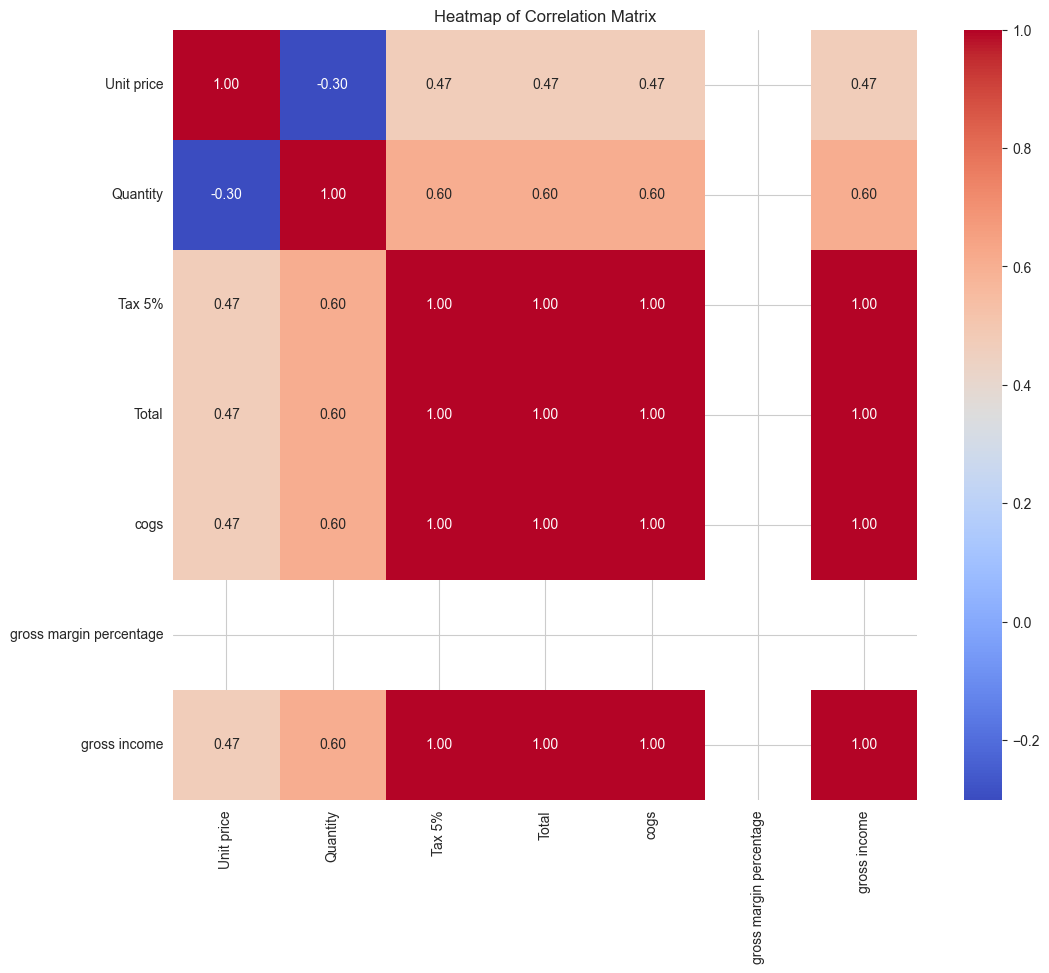

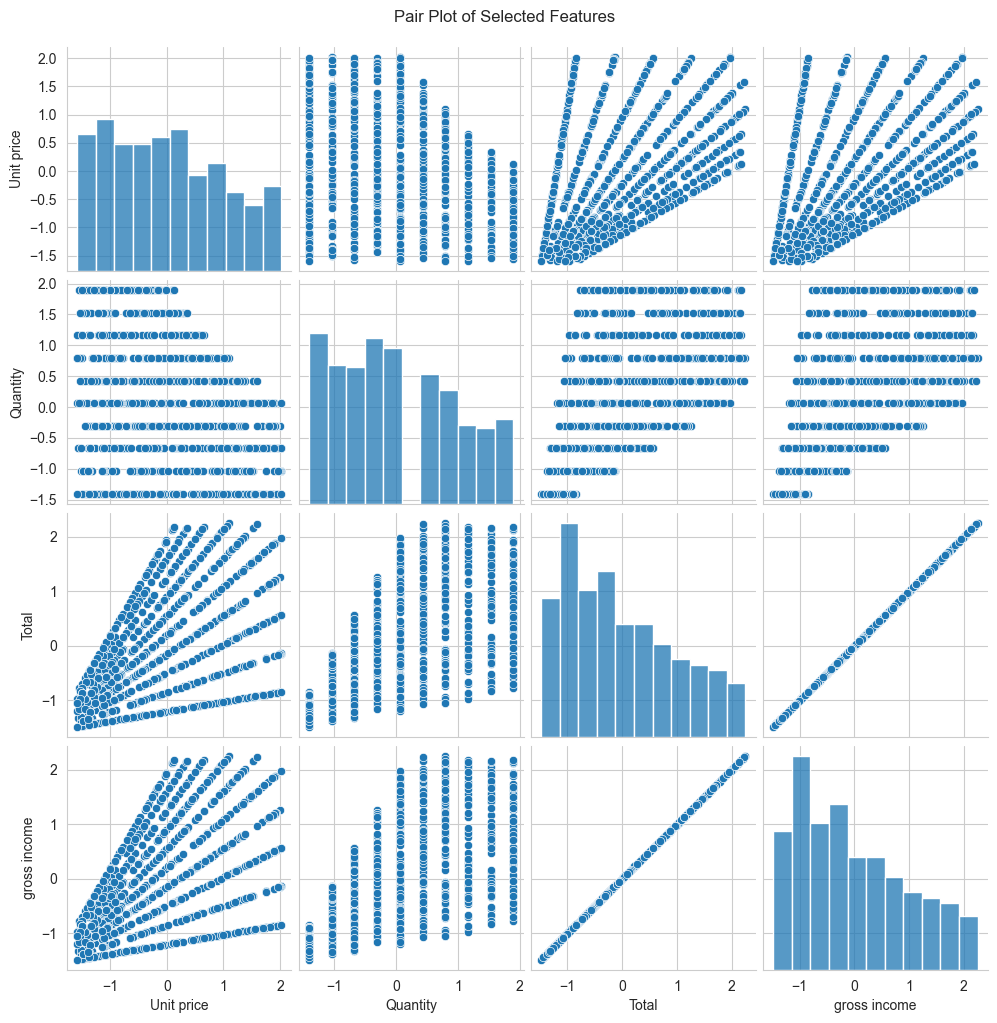

In [175]:

import matplotlib.pyplot as plt
import seaborn as sns


corrected_numerical_columns = [
    col for col in numerical_columns if col != 'Rating']


correlation_matrix = one_hot_encoded_df[corrected_numerical_columns].corr()
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True,
                      fmt=".2f", cmap="coolwarm")
plt.title('Heatmap of Correlation Matrix')
plt.show()

subset_of_features = ['Unit price', 'Quantity', 'Total', 'gross income']
pairplot = sns.pairplot(one_hot_encoded_df[subset_of_features])

pairplot.fig.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

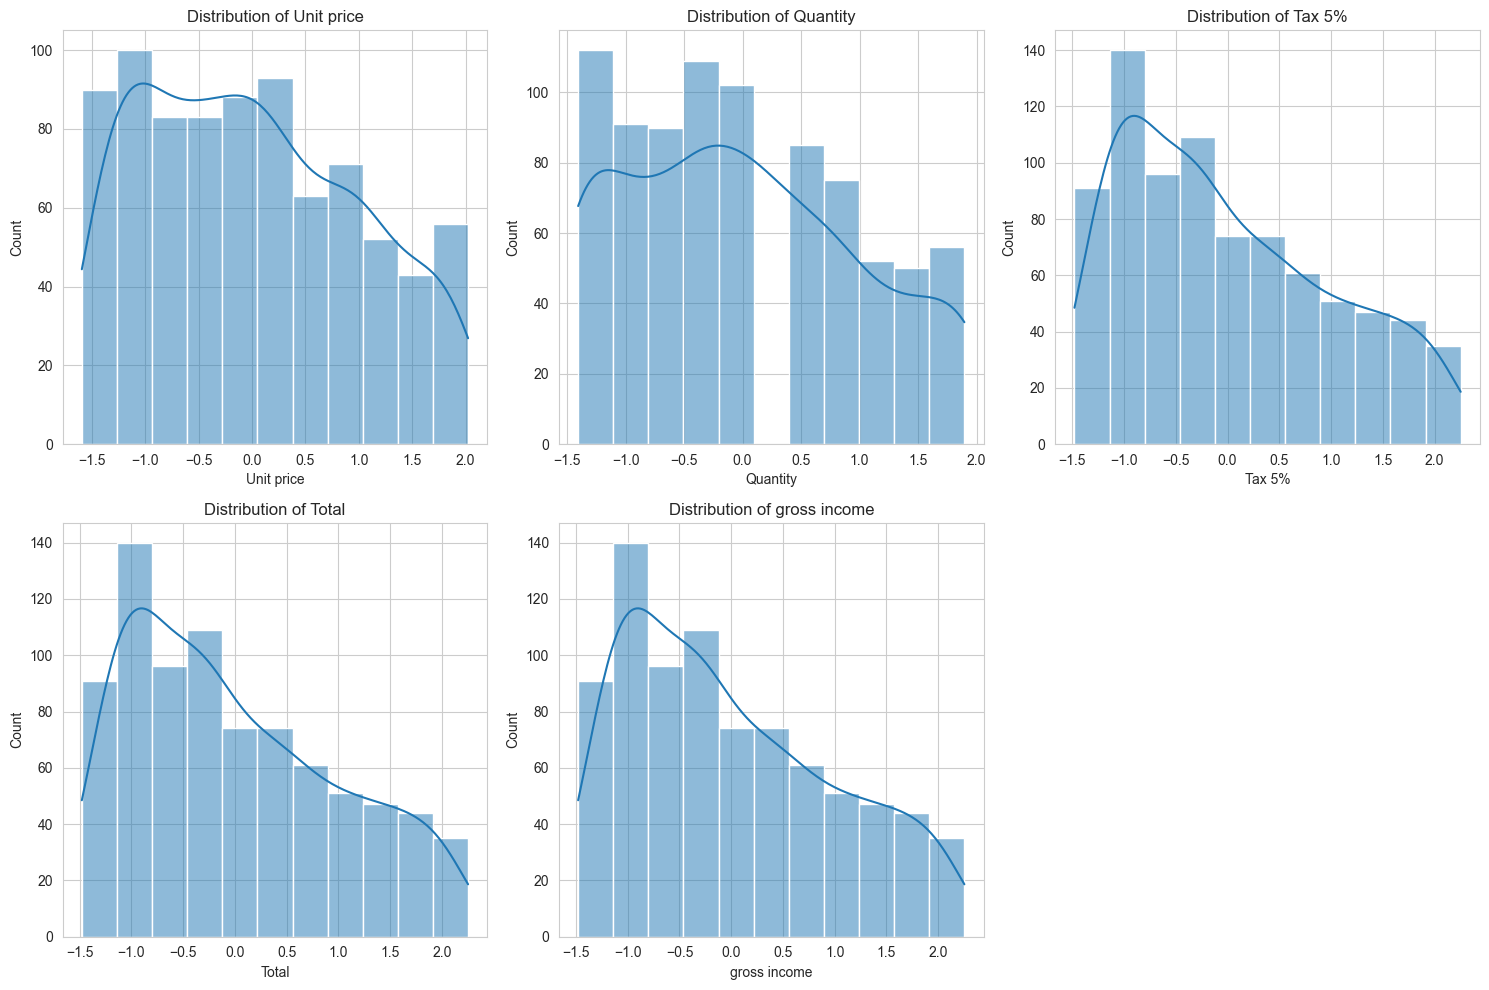

In [176]:

selected_numerical_features = ['Unit price',
                               'Quantity', 'Tax 5%', 'Total', 'gross income']

plt.figure(figsize=(15, 10))
for i, column in enumerate(selected_numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(one_hot_encoded_df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

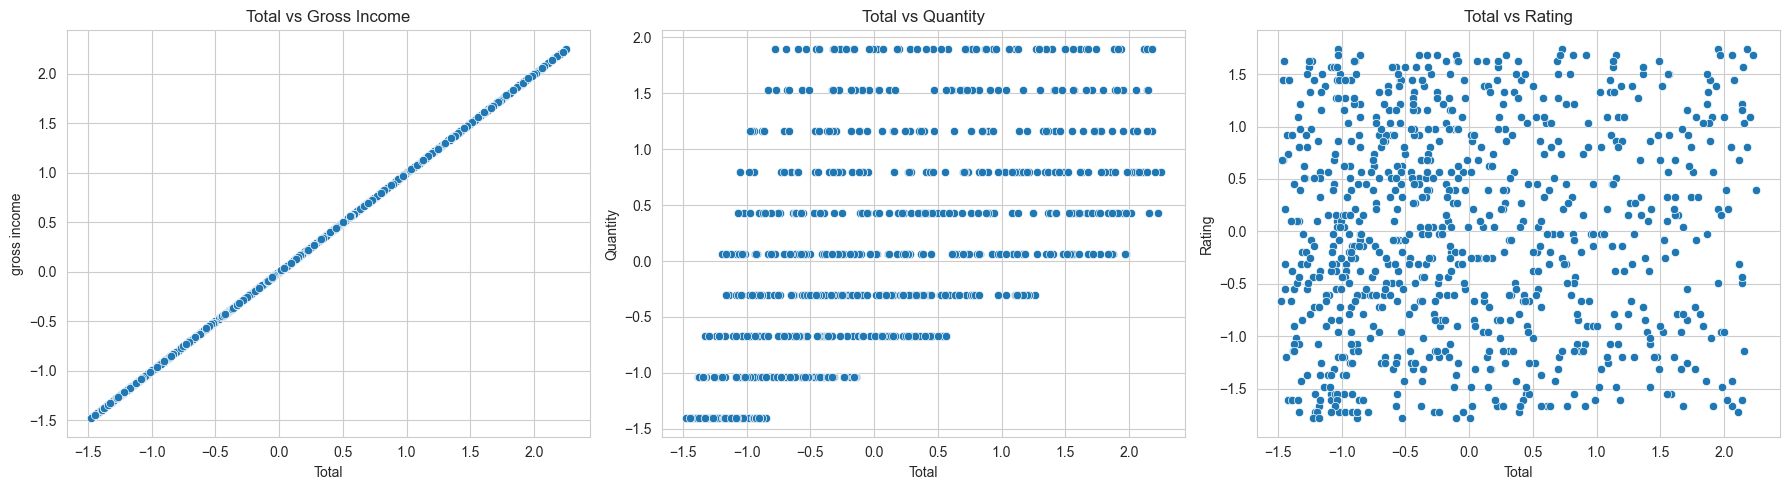

In [177]:


plt.figure(figsize=(18, 5))


plt.subplot(1, 3, 1)
sns.scatterplot(data=one_hot_encoded_df, x='Total', y='gross income')
plt.title('Total vs Gross Income')


plt.subplot(1, 3, 2)
sns.scatterplot(data=one_hot_encoded_df, x='Total', y='Quantity')
plt.title('Total vs Quantity')


plt.subplot(1, 3, 3)
sns.scatterplot(data=one_hot_encoded_df, x='Total', y='Rating')
plt.title('Total vs Rating')

plt.tight_layout()
plt.show()

2) Conduct an in-depth exploration of variable distributions within the dataset and identify intricate patterns.

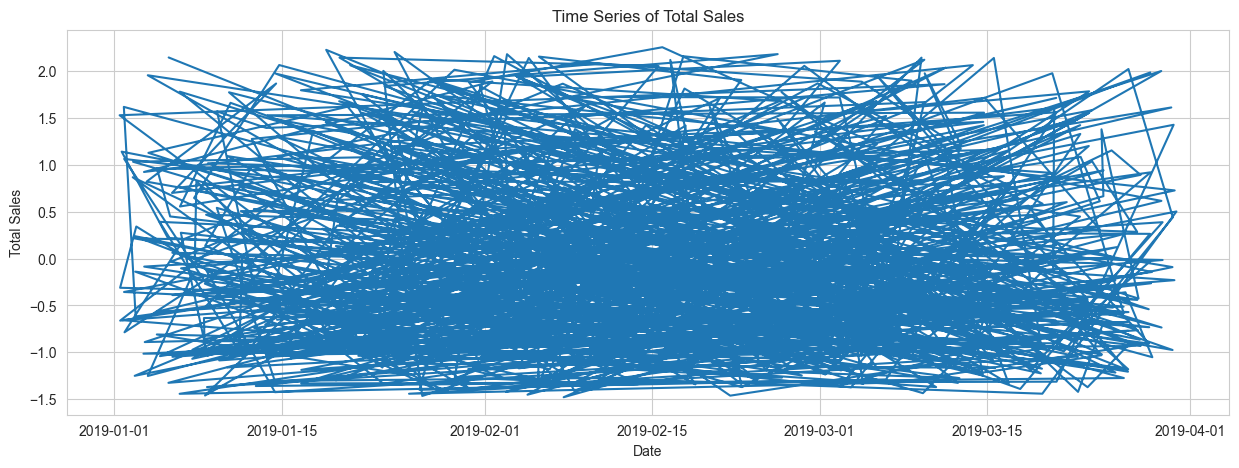

In [178]:

time_series_df = one_hot_encoded_df[['Total', 'Datetime']]

plt.figure(figsize=(15, 5))
plt.plot(time_series_df['Datetime'], time_series_df['Total'])
plt.title('Time Series of Total Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

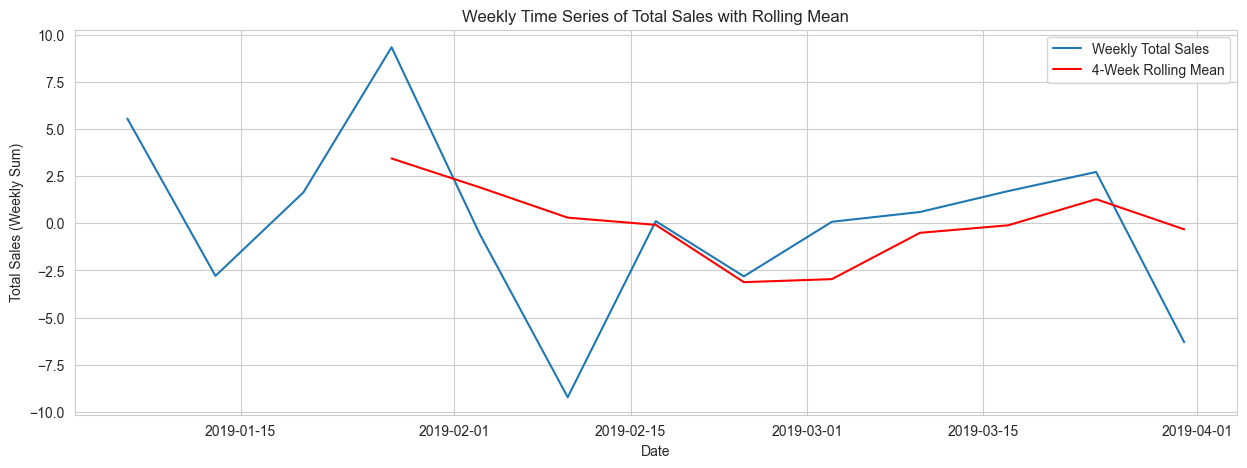

In [179]:
weekly_sales = time_series_df.resample('W', on='Datetime').sum()

weekly_sales['Total_smoothed'] = weekly_sales['Total'].rolling(window=4).mean()


plt.figure(figsize=(15, 5))
plt.plot(weekly_sales.index, weekly_sales['Total'], label='Weekly Total Sales')
plt.plot(weekly_sales.index,
         weekly_sales['Total_smoothed'], label='4-Week Rolling Mean', color='red')

plt.title('Weekly Time Series of Total Sales with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Total Sales (Weekly Sum)')
plt.legend()
plt.grid(True)
plt.show()

Association Rule Mining

1) Implement the Apriori algorithm to efficiently identify and extract frequent itemsets from the given dataset.

Algorithm

In [180]:

data = pd.read_csv(r'C:\datasets\Encoded_data.csv')
data.head()


columns_to_drop = ['Invoice ID', 'Unit price', 'Quantity', 'Tax 5%', 'Total',
                   'cogs', 'gross margin percentage', 'gross income', 'Rating', 'Datetime']
data_apriori = data.drop(columns=columns_to_drop)
data_apriori.head()

product_line_columns = [
    col for col in data_apriori.columns if 'Product line_' in col]
data_product_line_only = data_apriori[product_line_columns]


data_product_line_encoded = data_product_line_only.astype(int)

data_product_line_encoded.head()


columns_to_split = [col for col in data_product_line_encoded.columns if 'and' in col]

for col in columns_to_split:

    categories = col.replace('Product line_', '').split(' and ')
    for category in categories:
        new_col_name = f'Product line_{category.strip()}'
        data_product_line_encoded[new_col_name] = data_product_line_encoded[col]


data_product_line_encoded_split = data_product_line_encoded.drop(columns=columns_to_split)
data_product_line_encoded_split.head()



,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food,Product line_beverages,Product line_Health,Product line_beauty,Product line_Home,Product line_lifestyle,Product line_Sports,Product line_travel
0,0,0,0,0,1,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0
3,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,1


In [181]:
columns_to_split = [
    col for col in data_product_line_encoded.columns if 'and' in col]


for col in columns_to_split:
    categories = col.replace('Product line_', '').split(' and ')
    for category in categories:
  
        new_col_name = f'Product line_{category.strip()}'
        data_product_line_encoded[new_col_name] = data_product_line_encoded[col]


data_product_line_encoded_split = data_product_line_encoded.drop(
    columns=columns_to_split)

data_product_line_encoded_split

,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food,Product line_beverages,Product line_Health,Product line_beauty,Product line_Home,Product line_lifestyle,Product line_Sports,Product line_travel
0,0,0,0,0,1,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0
3,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,1,1,0,0,0,0
996,0,0,0,0,0,0,1,1,0,0
997,0,0,1,1,0,0,0,0,0,0
998,0,0,0,0,0,0,1,1,0,0


In [182]:
# data_product_line_encoded_split.to_csv('data_product_line_encoded_split.csv', index=False)

In [183]:
def apriori_basic(df, min_support, use_colnames=False):
    item_support_dict = {}
    num_records = len(df)
    for index, row in df.iterrows():
        for item in row[row > 0].index:
            if item in item_support_dict:
                item_support_dict[item] += 1
            else:
                item_support_dict[item] = 1


    qualifying_items = {item: support / num_records for item,
                        support in item_support_dict.items() if support / num_records >= min_support}

    if use_colnames:
        frequent_itemsets = pd.DataFrame(
            list(qualifying_items.items()), columns=["itemsets", "support"])
    else:
        frequent_itemsets = pd.DataFrame(
            list(qualifying_items.items()), columns=["itemsets", "support"])
        frequent_itemsets['itemsets'] = frequent_itemsets['itemsets'].apply(
            lambda x: frozenset([df.columns.tolist().index(x)]))

    return frequent_itemsets



frequent_itemsets = apriori_basic(
    data_product_line_encoded, min_support=0.01, use_colnames=True)


frequent_itemsets

,itemsets,support
0,Product line_Health and beauty,0.152
1,Product line_Health,0.152
2,Product line_beauty,0.152
3,Product line_Electronic accessories,0.170
4,Product line_Home and lifestyle,0.160
5,Product line_Home,0.160
6,Product line_lifestyle,0.160
7,Product line_Sports and travel,0.166
8,Product line_Sports,0.166
9,Product line_travel,0.166


Apriori and Association rules

In [184]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import numpy as np


data_product_line_encoded_split.csv = pd.read_csv(
    r'C:\datasets\data_product_line_encoded_split.csv')


frequent_itemsets = apriori(
    data_product_line_encoded_split.csv, min_support=0.01, use_colnames=True)

a_rules = association_rules(
    frequent_itemsets, metric="confidence", min_threshold=0.5)


frequent_itemsets= frequent_itemsets.sort_values(by='support', ascending=False)

print(frequent_itemsets)

    support                                     itemsets
1     0.178           (Product line_Fashion accessories)
2     0.174                          (Product line_Food)
3     0.174                     (Product line_beverages)
10    0.174  (Product line_Food, Product line_beverages)
0     0.170        (Product line_Electronic accessories)
8     0.166                        (Product line_Sports)
9     0.166                        (Product line_travel)
13    0.166   (Product line_Sports, Product line_travel)
6     0.160                          (Product line_Home)
7     0.160                     (Product line_lifestyle)
12    0.160  (Product line_Home, Product line_lifestyle)
4     0.152                        (Product line_Health)
5     0.152                        (Product line_beauty)
11    0.152   (Product line_beauty, Product line_Health)


In [185]:
# Print the first few association rules
print(a_rules.head)

<bound method NDFrame.head of                 antecedents               consequents  antecedent support   
0       (Product line_Food)  (Product line_beverages)               0.174  \
1  (Product line_beverages)       (Product line_Food)               0.174   
2     (Product line_beauty)     (Product line_Health)               0.152   
3     (Product line_Health)     (Product line_beauty)               0.152   
4       (Product line_Home)  (Product line_lifestyle)               0.160   
5  (Product line_lifestyle)       (Product line_Home)               0.160   
6     (Product line_Sports)     (Product line_travel)               0.166   
7     (Product line_travel)     (Product line_Sports)               0.166   

   consequent support  support  confidence      lift  leverage  conviction   
0               0.174    0.174         1.0  5.747126  0.143724         inf  \
1               0.174    0.174         1.0  5.747126  0.143724         inf   
2               0.152    0.152         1.0

In [186]:
rules = pd.DataFrame(a_rules)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Product line_Food),(Product line_beverages),0.174,0.174,0.174,1.0,5.747126,0.143724,inf,1.0
1,(Product line_beverages),(Product line_Food),0.174,0.174,0.174,1.0,5.747126,0.143724,inf,1.0
2,(Product line_beauty),(Product line_Health),0.152,0.152,0.152,1.0,6.578947,0.128896,inf,1.0
3,(Product line_Health),(Product line_beauty),0.152,0.152,0.152,1.0,6.578947,0.128896,inf,1.0
4,(Product line_Home),(Product line_lifestyle),0.160,0.160,0.160,1.0,6.250000,0.134400,inf,1.0
5,(Product line_lifestyle),(Product line_Home),0.160,0.160,0.160,1.0,6.250000,0.134400,inf,1.0
6,(Product line_Sports),(Product line_travel),0.166,0.166,0.166,1.0,6.024096,0.138444,inf,1.0
7,(Product line_travel),(Product line_Sports),0.166,0.166,0.166,1.0,6.024096,0.138444,inf,1.0


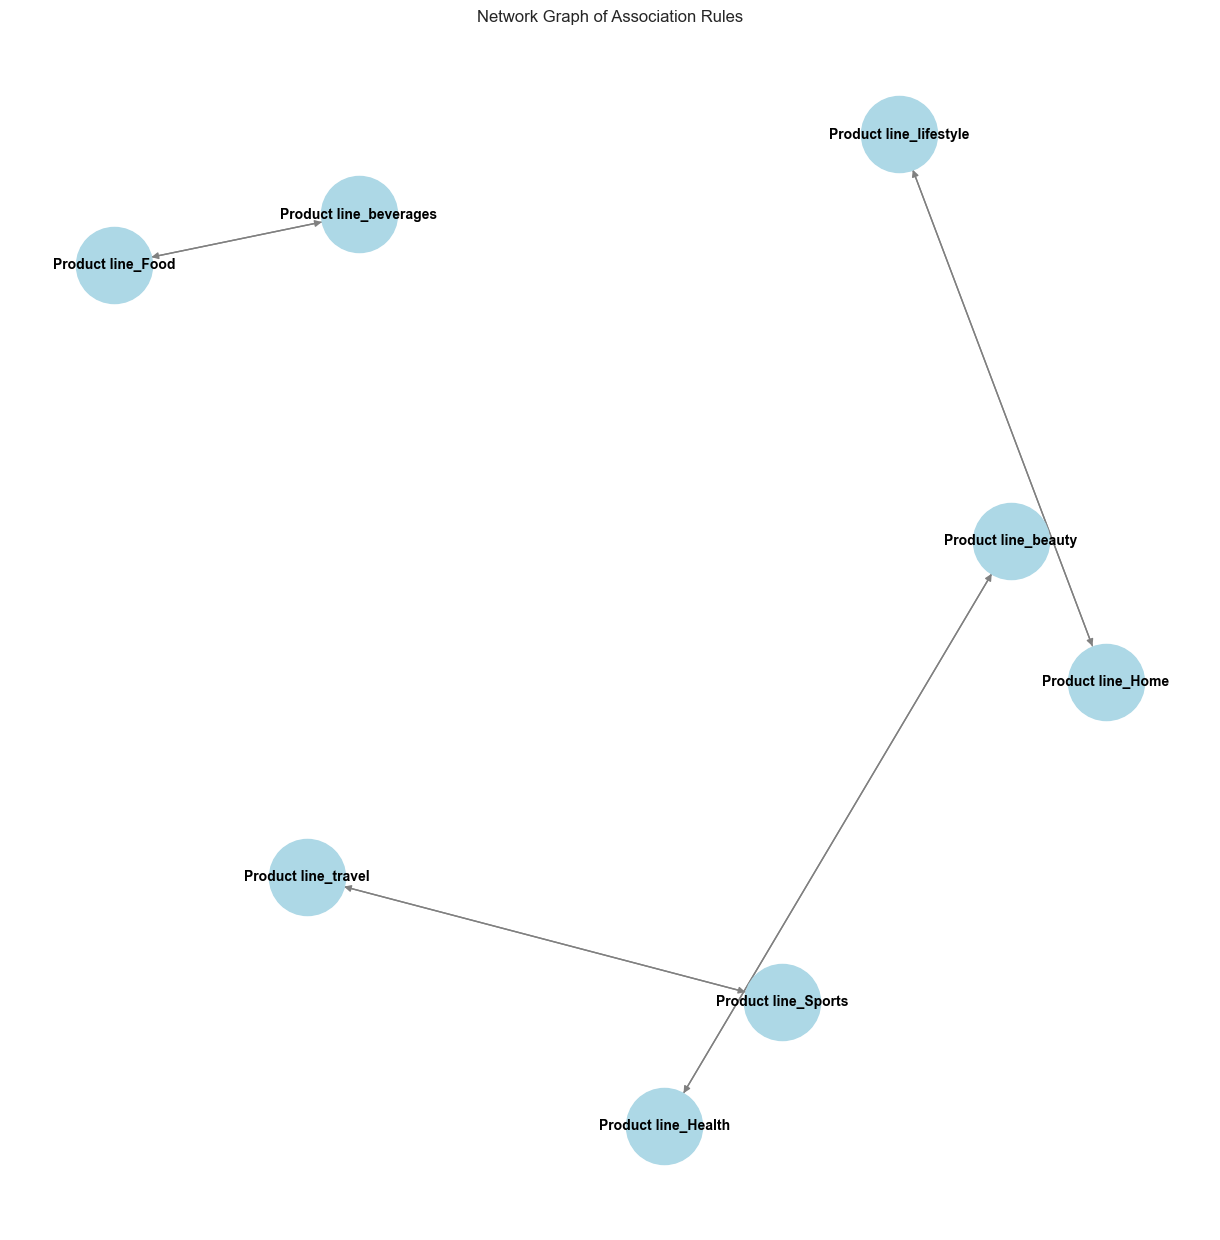

In [187]:
import networkx as nx

mock_rules = {
    'antecedents': ['Product line_Food', 'Product line_beverages', 'Product line_beauty',
                    'Product line_Health', 'Product line_lifestyle', 'Product line_Home',
                    'Product line_travel', 'Product line_Sports'],
    'consequents': ['Product line_beverages', 'Product line_Food', 'Product line_Health',
                    'Product line_beauty', 'Product line_Home', 'Product line_lifestyle',
                    'Product line_Sports', 'Product line_travel'],
    'support': [0.174, 0.174, 0.152, 0.152, 0.160, 0.160, 0.166, 0.166],
    'confidence': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    'lift': [5.747126, 5.747126, 6.578947, 6.578947, 6.25, 6.25, 6.024096, 6.024096]
}

rules_df = pd.DataFrame(mock_rules)

G = nx.DiGraph()
for i, row in rules_df.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['support'],
               confidence=row['confidence'], lift=row['lift'])

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5, iterations=20)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue',
        font_size=10, font_weight='bold', edge_color='gray')
plt.title("Network Graph of Association Rules")
plt.axis('off')
plt.show()


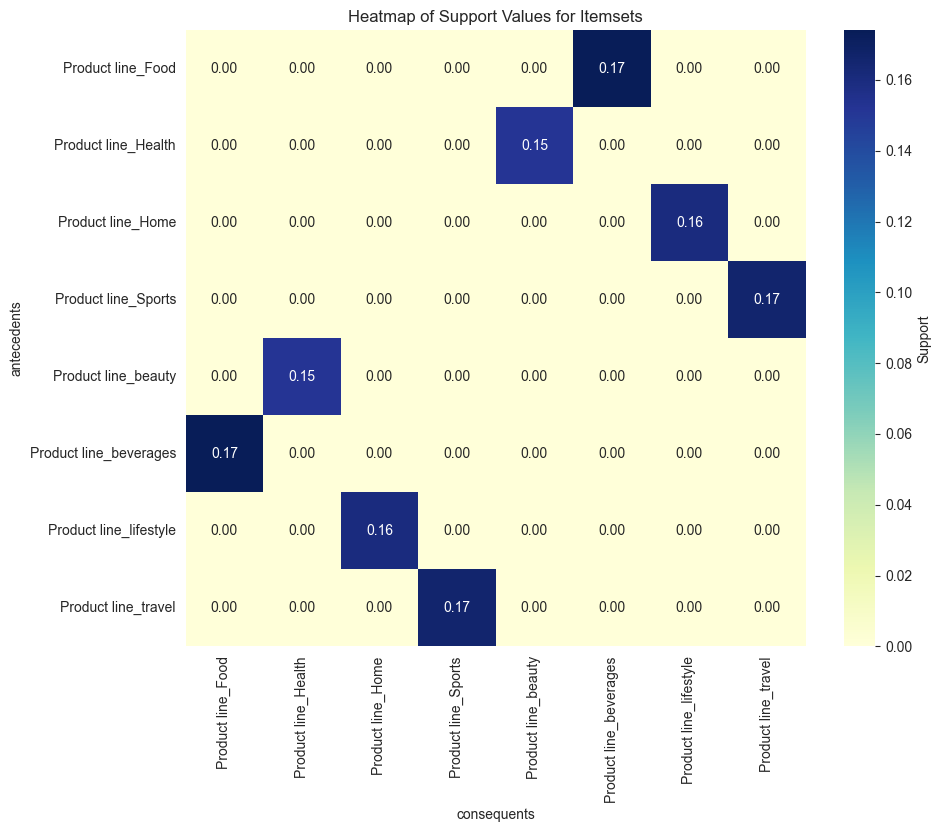

In [188]:
# Visualize the heatmap
support_matrix = rules_df.pivot(
    index='antecedents', columns='consequents', values='support').fillna(0)
plt.figure(figsize=(10, 8))
sns.heatmap(support_matrix, annot=True, fmt=".2f",
            cmap='YlGnBu', cbar_kws={'label': 'Support'})
plt.title('Heatmap of Support Values for Itemsets')
plt.show()

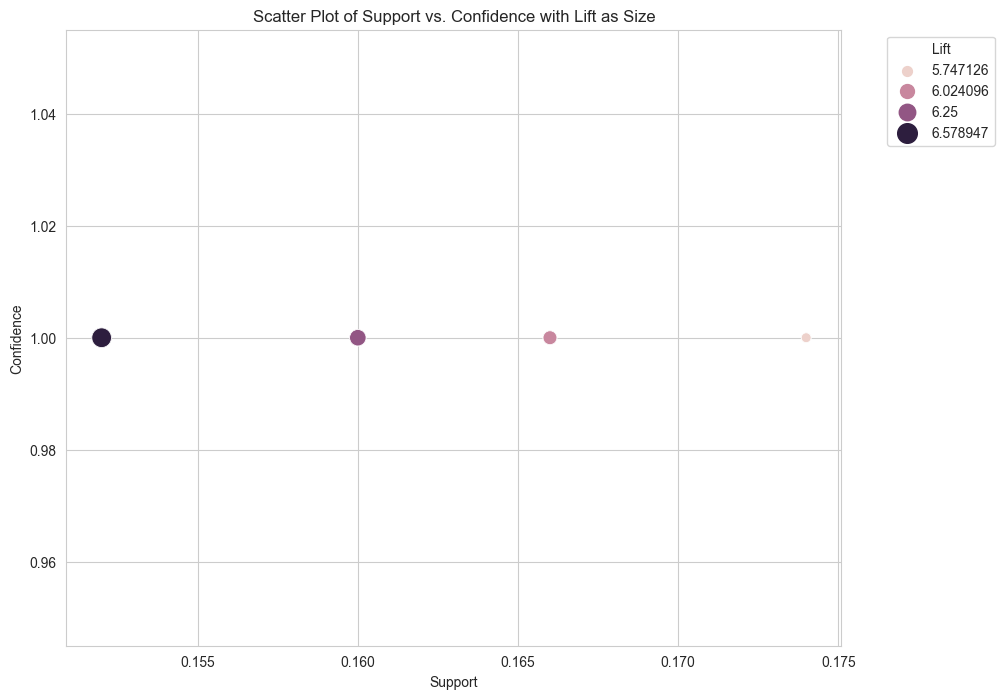

In [189]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=rules_df, x='support', y='confidence',
                size='lift', hue='lift', sizes=(50, 200))
plt.title('Scatter Plot of Support vs. Confidence with Lift as Size')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

FP GROWTH

Apriori Time: 2.0303995609283447 seconds, Memory: 306.37109375 MiB
FP-Growth Time: 2.0612146854400635 seconds, Memory: 306.37109375 MiB


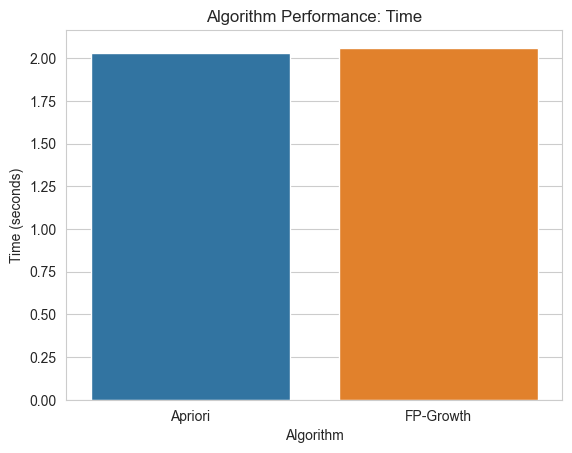

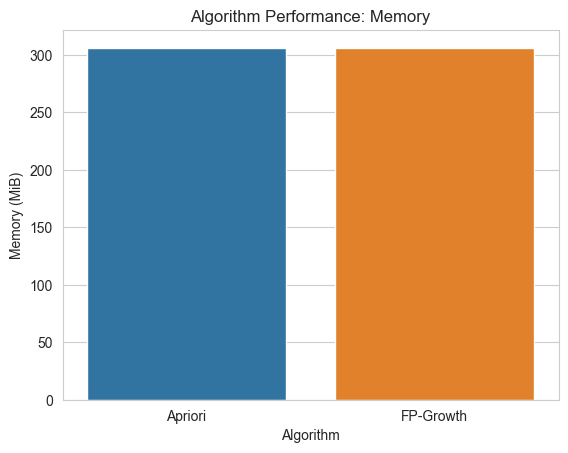

In [190]:
from mlxtend.frequent_patterns import apriori, fpgrowth
from memory_profiler import memory_usage
import time
import pandas as pd
import warnings


warnings.filterwarnings(
    'ignore', category=DeprecationWarning, module='mlxtend.*')


def run_apriori(data):
    return apriori(data, min_support=0.01, use_colnames=True)


def run_fpgrowth(data):
    return fpgrowth(data, min_support=0.01, use_colnames=True)


def main():
    dataset = pd.read_csv(r'C:\datasets\data_product_line_encoded_split.csv')

    start_time = time.time()
    mem_usage_apriori = memory_usage((run_apriori, (dataset,)))
    apriori_time = time.time() - start_time


    start_time = time.time()
    mem_usage_fpgrowth = memory_usage((run_fpgrowth, (dataset,)))
    fpgrowth_time = time.time() - start_time


    apriori_data = {'Algorithm': 'Apriori', 'Time (seconds)': apriori_time, 'Memory (MiB)': max(mem_usage_apriori)}
    fpgrowth_data = {'Algorithm': 'FP-Growth', 'Time (seconds)': fpgrowth_time, 'Memory (MiB)': max(mem_usage_fpgrowth)}
    performance_data = pd.DataFrame([apriori_data, fpgrowth_data])


    print(
        f"Apriori Time: {apriori_time} seconds, Memory: {max(mem_usage_apriori)} MiB")
    print(
        f"FP-Growth Time: {fpgrowth_time} seconds, Memory: {max(mem_usage_fpgrowth)} MiB")


    sns.barplot(x='Algorithm', y='Time (seconds)', data=performance_data)
    plt.title('Algorithm Performance: Time')
    plt.show()

    sns.barplot(x='Algorithm', y='Memory (MiB)', data=performance_data)
    plt.title('Algorithm Performance: Memory')
    plt.show()


if __name__ == '__main__':
    main()

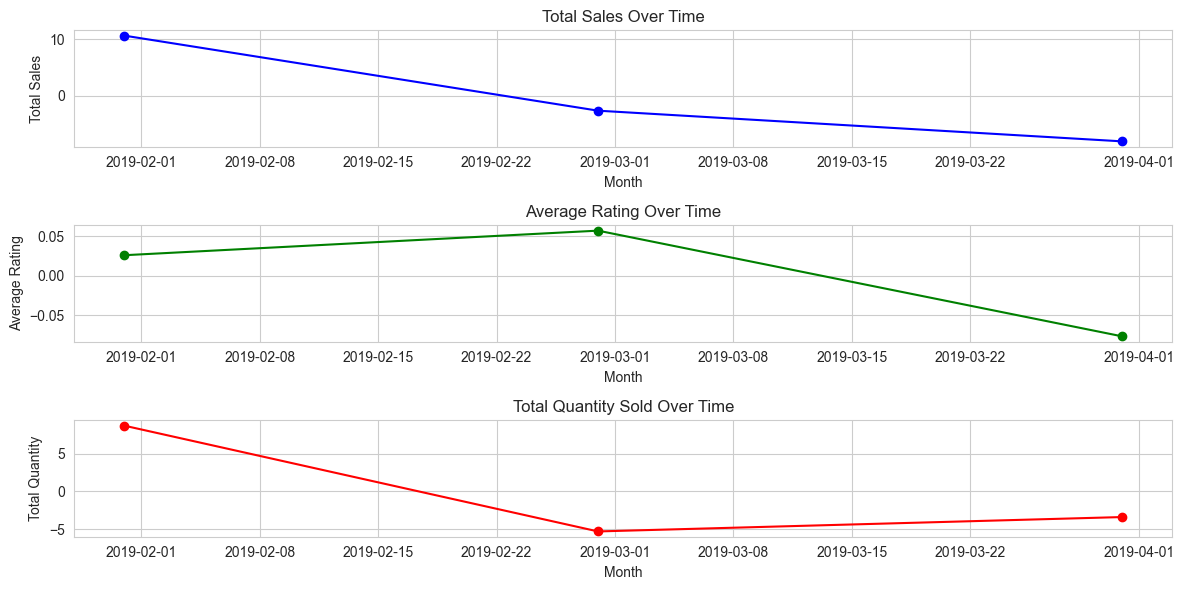

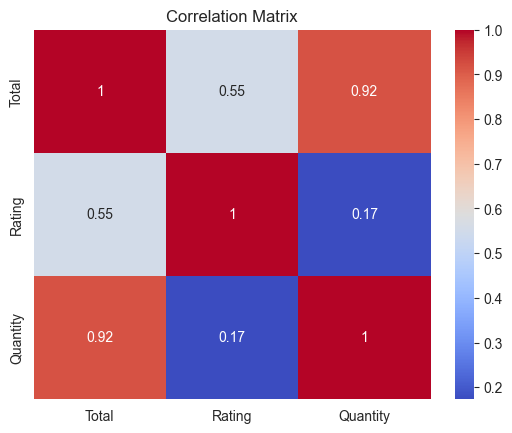

,Total,Rating,Quantity
Datetime,,,
2019-01-31,10.610137,0.026147,8.720149
2019-02-28,-2.602314,0.057394,-5.314910
2019-03-31,-8.007823,-0.077085,-3.405239


In [191]:
from pandas import Grouper
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


encoded_data = pd.read_csv(
    r'C:\datasets\Processed_Encoded_data_with_split.csv')

encoded_data['Datetime'] = pd.to_datetime(encoded_data['Datetime'])
encoded_data.set_index('Datetime', inplace=True)


monthly_data = encoded_data.resample('M').agg(
    {'Total': 'sum', 'Rating': 'mean', 'Quantity': 'sum'})


plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
plt.plot(monthly_data.index, monthly_data['Total'], marker='o', color='blue')
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')


plt.subplot(3, 1, 2)
plt.plot(monthly_data.index, monthly_data['Rating'], marker='o', color='green')
plt.title('Average Rating Over Time')
plt.xlabel('Month')
plt.ylabel('Average Rating')

plt.subplot(3, 1, 3)
plt.plot(monthly_data.index, monthly_data['Quantity'], marker='o', color='red')
plt.title('Total Quantity Sold Over Time')
plt.xlabel('Month')
plt.ylabel('Total Quantity')

plt.tight_layout()
plt.show()


correlation = monthly_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

monthly_data.head()

Cluster       0    1    2
Datetime                 
2019-01-31   98  115  139
2019-02-28   96   94  113
2019-03-31  119  104  122


<Figure size 1000x600 with 0 Axes>

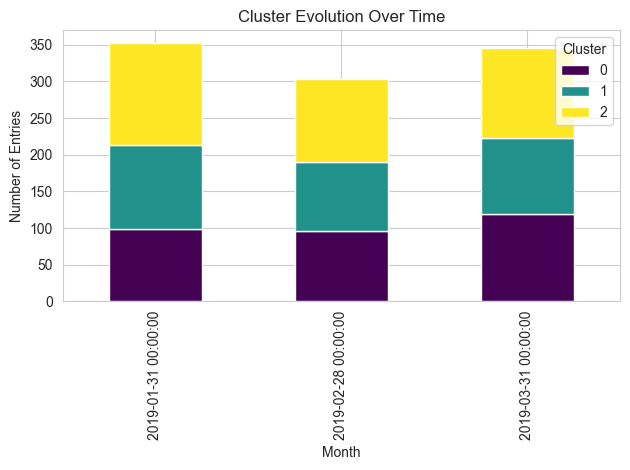

In [192]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

encoded_data = pd.read_csv(
    r'C:\datasets\Processed_Encoded_data_with_split.csv')

encoded_data['Datetime'] = pd.to_datetime(encoded_data['Datetime'])
encoded_data.set_index('Datetime', inplace=True)

if 'Cluster' not in encoded_data.columns:
    clustering_data = encoded_data[['Total', 'Quantity', 'Rating']]
    kmeans = KMeans(n_clusters=3, n_init=10,
                    random_state=0).fit(clustering_data)
    encoded_data['Cluster'] = kmeans.labels_

cluster_evolution_simple = encoded_data.groupby(
    [pd.Grouper(freq='M'), 'Cluster']).size().unstack(fill_value=0)

print(cluster_evolution_simple)


# -------------------------------------

plt.figure(figsize=(10, 6))
cluster_evolution_simple.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Cluster Evolution Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Entries')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [193]:
df = pd.read_csv(r'C:\datasets\Processed_Encoded_data_with_split.csv')

columns_to_keep = ['Unit price', 'Quantity','Tax 5%', 'Total','cogs', 'gross margin percentage', 'gross income', 'Rating']

selected_columns = df[columns_to_keep]

# selected_columns.to_csv('clustering.csv', index=False)

selected_columns

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,0.718160,0.509930,0.919607,0.919607,0.919607,0.0,0.919607,1.238443
1,-1.525303,-0.174540,-0.987730,-0.987730,-0.987730,0.0,-0.987730,1.529527
2,-0.352781,0.509930,0.071446,0.071446,0.071446,0.0,0.071446,0.248760
3,0.096214,0.852165,0.675780,0.675780,0.675780,0.0,0.675780,0.830927
4,1.156959,0.509930,1.267125,1.267125,1.267125,0.0,1.267125,-0.973790
...,...,...,...,...,...,...,...,...
995,-0.578600,-1.543480,-1.141750,-1.141750,-1.141750,0.0,-1.141750,-0.449840
996,1.574989,1.536635,2.846340,2.846340,2.846340,0.0,2.846340,-1.497741
997,-0.899958,-1.543480,-1.178109,-1.178109,-1.178109,0.0,-1.178109,0.423410
998,0.383208,-1.543480,-1.032932,-1.032932,-1.032932,0.0,-1.032932,-1.672391


SEQUENTIAL PATTERN MINING

In [194]:
import pandas as pd


encoded_data = pd.read_csv(r'C:\datasets\Encoded_Data.csv')


df = pd.DataFrame()


df['Datetime'] = encoded_data['Datetime']


df['Itemset'] = encoded_data.apply(
    lambda row: [col.replace('Product line_', '') for col in encoded_data.columns if col.startswith(
        'Product line_') and row[col] == 1],
    axis=1
)

df['Datetime'] = encoded_data['Datetime']

df.head()

,Datetime,Itemset
0,2019-01-05 13:08:00,[Health and beauty]
1,2019-03-08 10:29:00,[Electronic accessories]
2,2019-03-03 13:23:00,[Home and lifestyle]
3,2019-01-27 20:33:00,[Health and beauty]
4,2019-02-08 10:37:00,[Sports and travel]


In [195]:

df['Datetime'] = pd.to_datetime(df['Datetime'])


df = df.sort_values('Datetime')


sequences = df.groupby(df['Datetime'].dt.date)['Itemset'].agg(sum).tolist()

sequences

[['Sports and travel',
  'Food and beverages',
  'Sports and travel',
  'Health and beauty',
  'Fashion accessories',
  'Electronic accessories',
  'Home and lifestyle',
  'Electronic accessories',
  'Electronic accessories',
  'Food and beverages',
  'Sports and travel',
  'Sports and travel'],
 ['Health and beauty',
  'Fashion accessories',
  'Food and beverages',
  'Sports and travel',
  'Sports and travel',
  'Fashion accessories',
  'Electronic accessories',
  'Sports and travel'],
 ['Health and beauty',
  'Health and beauty',
  'Health and beauty',
  'Sports and travel',
  'Home and lifestyle',
  'Health and beauty',
  'Health and beauty',
  'Home and lifestyle'],
 ['Health and beauty',
  'Sports and travel',
  'Home and lifestyle',
  'Electronic accessories',
  'Fashion accessories',
  'Electronic accessories'],
 ['Home and lifestyle',
  'Fashion accessories',
  'Electronic accessories',
  'Fashion accessories',
  'Health and beauty',
  'Home and lifestyle',
  'Home and lifestyl

In [196]:
from prefixspan import PrefixSpan

prefixspan_model = PrefixSpan(sequences)
patterns = prefixspan_model.topk(
    5, closed=True, generator=True) 
patterns

[(78, ['Sports and travel']),
 (77, ['Fashion accessories']),
 (76, ['Food and beverages']),
 (75, ['Electronic accessories']),
 (75, ['Home and lifestyle'])]

In [197]:

for pattern in patterns:
    print(f"Pattern: {pattern[1]}, Number of times it appeared: {pattern[0]}")

Pattern: ['Sports and travel'], Number of times it appeared: 78
Pattern: ['Fashion accessories'], Number of times it appeared: 77
Pattern: ['Food and beverages'], Number of times it appeared: 76
Pattern: ['Electronic accessories'], Number of times it appeared: 75
Pattern: ['Home and lifestyle'], Number of times it appeared: 75


CLUSTERING

In [198]:
df = pd.read_csv(r'C:\datasets\Processed_Encoded_data_with_split.csv')

features = ['Unit price', 'Quantity', 'Tax 5%', 'Total',
            'cogs', 'gross margin percentage', 'gross income', 'Rating']

features

['Unit price',
 'Quantity',
 'Tax 5%',
 'Total',
 'cogs',
 'gross margin percentage',
 'gross income',
 'Rating']

In [199]:
df

,Invoice ID,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Datetime,...,Gender_Female,Gender_Male,Product line_Food,Product line_beverages,Product line_Health,Product line_beauty,Product line_Home,Product line_lifestyle,Product line_Sports,Product line_travel
0,750-67-8428,0.718160,0.509930,0.919607,0.919607,0.919607,0.0,0.919607,1.238443,2019-01-05 13:08:00,...,1,0,0,0,1,1,0,0,0,0
1,226-31-3081,-1.525303,-0.174540,-0.987730,-0.987730,-0.987730,0.0,-0.987730,1.529527,2019-03-08 10:29:00,...,1,0,0,0,0,0,0,0,0,0
2,631-41-3108,-0.352781,0.509930,0.071446,0.071446,0.071446,0.0,0.071446,0.248760,2019-03-03 13:23:00,...,0,1,0,0,0,0,1,1,0,0
3,123-19-1176,0.096214,0.852165,0.675780,0.675780,0.675780,0.0,0.675780,0.830927,2019-01-27 20:33:00,...,0,1,0,0,1,1,0,0,0,0
4,373-73-7910,1.156959,0.509930,1.267125,1.267125,1.267125,0.0,1.267125,-0.973790,2019-02-08 10:37:00,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,-0.578600,-1.543480,-1.141750,-1.141750,-1.141750,0.0,-1.141750,-0.449840,2019-01-29 13:46:00,...,0,1,0,0,1,1,0,0,0,0
996,303-96-2227,1.574989,1.536635,2.846340,2.846340,2.846340,0.0,2.846340,-1.497741,2019-03-02 17:16:00,...,1,0,0,0,0,0,1,1,0,0
997,727-02-1313,-0.899958,-1.543480,-1.178109,-1.178109,-1.178109,0.0,-1.178109,0.423410,2019-02-09 13:22:00,...,0,1,1,1,0,0,0,0,0,0
998,347-56-2442,0.383208,-1.543480,-1.032932,-1.032932,-1.032932,0.0,-1.032932,-1.672391,2019-02-22 15:33:00,...,0,1,0,0,0,0,1,1,0,0


C:\Users\Shaheer Aslam\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


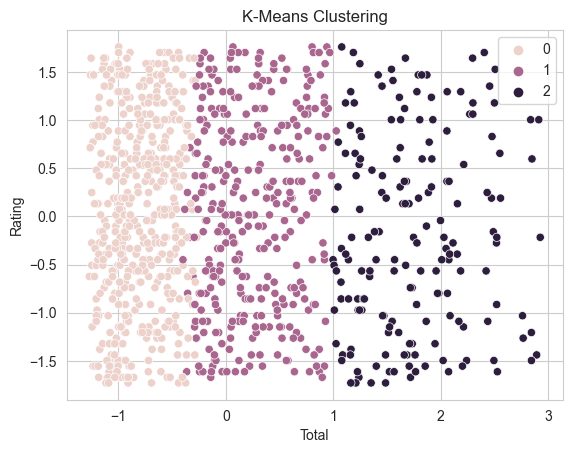

In [200]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift

kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(df[features])
sns.scatterplot(x='Total', y='Rating', hue=kmeans_labels, data=df, color='red')
plt.title('K-Means Clustering')
plt.show()

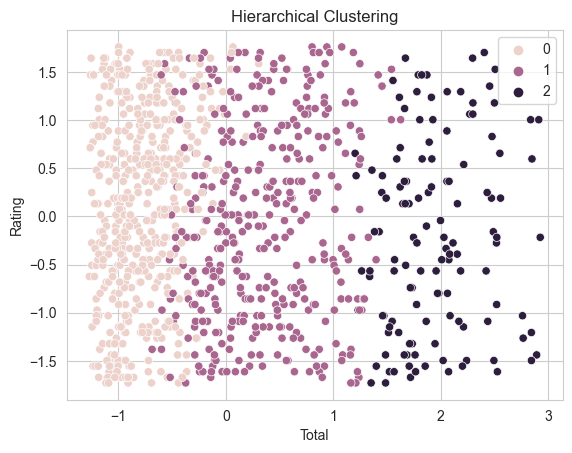

In [201]:

agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative_labels = agglomerative.fit_predict(df[features])


sns.scatterplot(x='Total', y='Rating', hue=agglomerative_labels, data=df)
plt.title('Hierarchical Clustering')
plt.show()

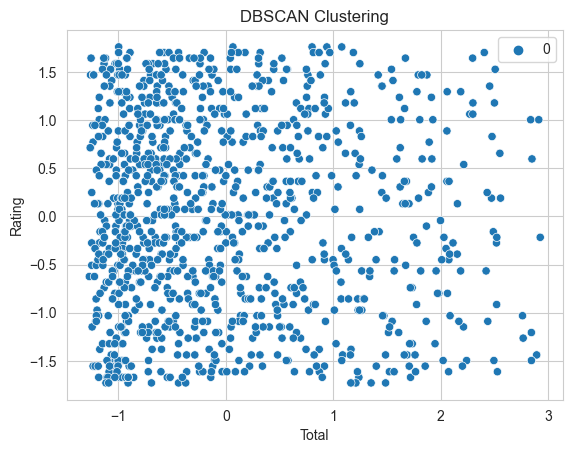

In [202]:

dbscan = DBSCAN(eps=1.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(df[features])


sns.scatterplot(x='Total', y='Rating', hue=dbscan_labels, data=df)
plt.title('DBSCAN Clustering')
plt.show()

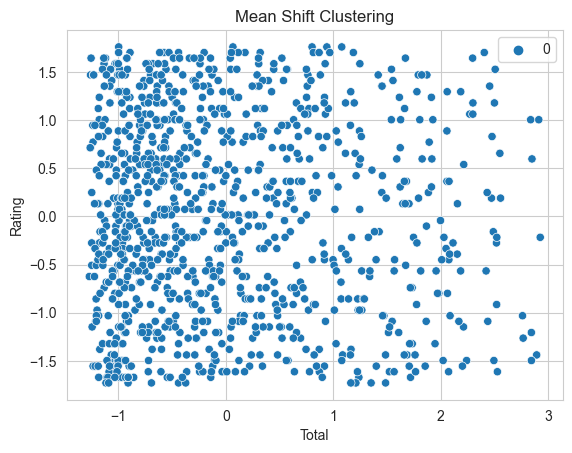

In [203]:

meanshift = MeanShift()
meanshift_labels = meanshift.fit_predict(df[features])

sns.scatterplot(x='Total', y='Rating', hue=meanshift_labels, data=df)
plt.title('Mean Shift Clustering')
plt.show()

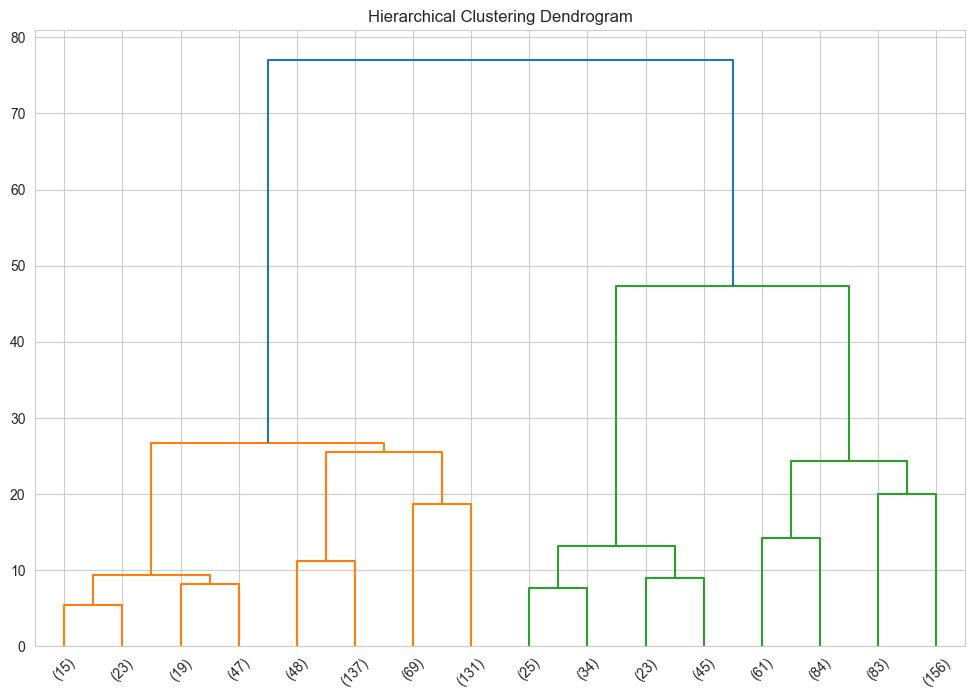

In [204]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(df[features], method='ward')

plt.figure(figsize=(12, 8))

dendrogram(linkage_matrix, truncate_mode='level', p=3,

           leaf_rotation=45, leaf_font_size=10, show_leaf_counts=True)

plt.title('Hierarchical Clustering Dendrogram')

plt.show()

CLASSFICATION

In [205]:
summary = df
summary

,Invoice ID,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Datetime,...,Gender_Female,Gender_Male,Product line_Food,Product line_beverages,Product line_Health,Product line_beauty,Product line_Home,Product line_lifestyle,Product line_Sports,Product line_travel
0,750-67-8428,0.718160,0.509930,0.919607,0.919607,0.919607,0.0,0.919607,1.238443,2019-01-05 13:08:00,...,1,0,0,0,1,1,0,0,0,0
1,226-31-3081,-1.525303,-0.174540,-0.987730,-0.987730,-0.987730,0.0,-0.987730,1.529527,2019-03-08 10:29:00,...,1,0,0,0,0,0,0,0,0,0
2,631-41-3108,-0.352781,0.509930,0.071446,0.071446,0.071446,0.0,0.071446,0.248760,2019-03-03 13:23:00,...,0,1,0,0,0,0,1,1,0,0
3,123-19-1176,0.096214,0.852165,0.675780,0.675780,0.675780,0.0,0.675780,0.830927,2019-01-27 20:33:00,...,0,1,0,0,1,1,0,0,0,0
4,373-73-7910,1.156959,0.509930,1.267125,1.267125,1.267125,0.0,1.267125,-0.973790,2019-02-08 10:37:00,...,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,-0.578600,-1.543480,-1.141750,-1.141750,-1.141750,0.0,-1.141750,-0.449840,2019-01-29 13:46:00,...,0,1,0,0,1,1,0,0,0,0
996,303-96-2227,1.574989,1.536635,2.846340,2.846340,2.846340,0.0,2.846340,-1.497741,2019-03-02 17:16:00,...,1,0,0,0,0,0,1,1,0,0
997,727-02-1313,-0.899958,-1.543480,-1.178109,-1.178109,-1.178109,0.0,-1.178109,0.423410,2019-02-09 13:22:00,...,0,1,1,1,0,0,0,0,0,0
998,347-56-2442,0.383208,-1.543480,-1.032932,-1.032932,-1.032932,0.0,-1.032932,-1.672391,2019-02-22 15:33:00,...,0,1,0,0,0,0,1,1,0,0


In [206]:
summary['KMeansClustering'] = kmeans_labels

kmeans_summary = summary.groupby('KMeansClustering')[features].mean()

print(kmeans_summary)

                  Unit price  Quantity    Tax 5%     Total      cogs   
KMeansClustering                                                       
0                  -0.535856 -0.626403 -0.806742 -0.806742 -0.806742  \
1                   0.221493  0.341868  0.251202  0.251202  0.251202   
2                   1.053900  1.074521  1.742820  1.742820  1.742820   

                  gross margin percentage  gross income    Rating  
KMeansClustering                                                   
0                                     0.0     -0.806742  0.041355  
1                                     0.0      0.251202  0.032700  
2                                     0.0      1.742820 -0.175860  


In [207]:

summary['HierarchicalCluster'] = agglomerative_labels


hierarchical_summary = summary.groupby(
    'HierarchicalCluster')[features].mean()

print(hierarchical_summary)

                     Unit price  Quantity    Tax 5%     Total      cogs   
HierarchicalCluster                                                       
0                     -0.612504 -0.506977 -0.783863 -0.783863 -0.783863  \
1                      0.423463  0.233647  0.351349  0.351349  0.351349   
2                      1.077991  1.245601  1.955836  1.955836  1.955836   

                     gross margin percentage  gross income    Rating  
HierarchicalCluster                                                   
0                                        0.0     -0.783863  0.110897  
1                                        0.0      0.351349 -0.072948  
2                                        0.0      1.955836 -0.206430  


In [208]:

summary['MeanShiftCluster'] = meanshift_labels

meanshift_summary = summary.groupby('MeanShiftCluster')[features].mean()
print(meanshift_summary)

                    Unit price      Quantity        Tax 5%         Total   
MeanShiftCluster                                                           
0                -1.079137e-16  5.717649e-17  1.236788e-16  3.175238e-17  \

                          cogs  gross margin percentage  gross income   
MeanShiftCluster                                                        
0                 1.820766e-17                      0.0  1.236788e-16  \

                        Rating  
MeanShiftCluster                
0                 1.935674e-16  


In [209]:

summary['DBSCAN_Cluster'] = dbscan_labels


dbscan_summary = summary.groupby('DBSCAN_Cluster')[features].mean()

print(dbscan_summary)

                  Unit price      Quantity        Tax 5%         Total   
DBSCAN_Cluster                                                           
0              -1.079137e-16  5.717649e-17  1.236788e-16  3.175238e-17  \

                        cogs  gross margin percentage  gross income   
DBSCAN_Cluster                                                        
0               1.820766e-17                      0.0  1.236788e-16  \

                      Rating  
DBSCAN_Cluster                
0               1.935674e-16  


In [210]:
summaryTime = df
features = ['Unit price', 'Quantity', 'Tax 5%', 'Total',
            'cogs', 'gross margin percentage', 'gross income', 'Rating']


In [211]:

cluster_df = pd.DataFrame(index=summaryTime.index)

kmeans = KMeans(n_clusters=3, n_init=10)
kmeans_labels = kmeans.fit_predict(summaryTime[features])
cluster_df['KMeansClustering'] = kmeans_labels

In [212]:

agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative_labels = agglomerative.fit_predict(summaryTime[features])
cluster_df['HierarchicalCluster'] = agglomerative_labels

In [213]:

dbscan = DBSCAN(eps=1.0, min_samples=5)
dbscan_labels = dbscan.fit_predict(summaryTime[features])
cluster_df['DBSCANCluster'] = dbscan_labels

In [214]:

meanshift = MeanShift()
meanshift_labels = meanshift.fit_predict(summaryTime[features])
cluster_df['MeanShiftCluster'] = meanshift_labels

In [215]:
cluster_df

,KMeansClustering,HierarchicalCluster,DBSCANCluster,MeanShiftCluster
0,2,1,0,0
1,1,0,0,0
2,2,1,0,0
3,2,1,0,0
4,0,1,0,0
...,...,...,...,...
995,1,0,0,0
996,0,2,0,0
997,1,0,0,0
998,1,0,0,0


In [216]:

print("Columns in cluster_df:", cluster_df.columns)
print("Columns in summary:", summaryTime.columns)

for column in cluster_df.columns:
    if column in summaryTime.columns:
        time_cluster_summary = summaryTime.groupby(
            ['Datetime', column]).size().unstack(fill_value=0)
        print(f"\nCluster Evolution Over Datetime ({column}):")
        print(time_cluster_summary)
    else:
        print(f"Column {column} not found")

Columns in cluster_df: Index(['KMeansClustering', 'HierarchicalCluster', 'DBSCANCluster',
       'MeanShiftCluster'],
      dtype='object')
Columns in summary: Index(['Invoice ID', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'Datetime',
       'Branch_A', 'Branch_B', 'Branch_C', 'City_Mandalay', 'City_Naypyitaw',
       'City_Yangon', 'Customer type_Member', 'Customer type_Normal',
       'Product line_Electronic accessories',
       'Product line_Fashion accessories', 'Payment_Cash',
       'Payment_Credit card', 'Payment_Ewallet', 'Gender_Female',
       'Gender_Male', 'Product line_Food', 'Product line_beverages',
       'Product line_Health', 'Product line_beauty', 'Product line_Home',
       'Product line_lifestyle', 'Product line_Sports', 'Product line_travel',
       'KMeansClustering', 'HierarchicalCluster', 'MeanShiftCluster',
       'DBSCAN_Cluster'],
      dtype='object')

Cluster Evolution Over Datetime (K

CLASSIFICATION

In [217]:
df = pd.read_csv(r'C:\datasets\supermarketsales.csv')

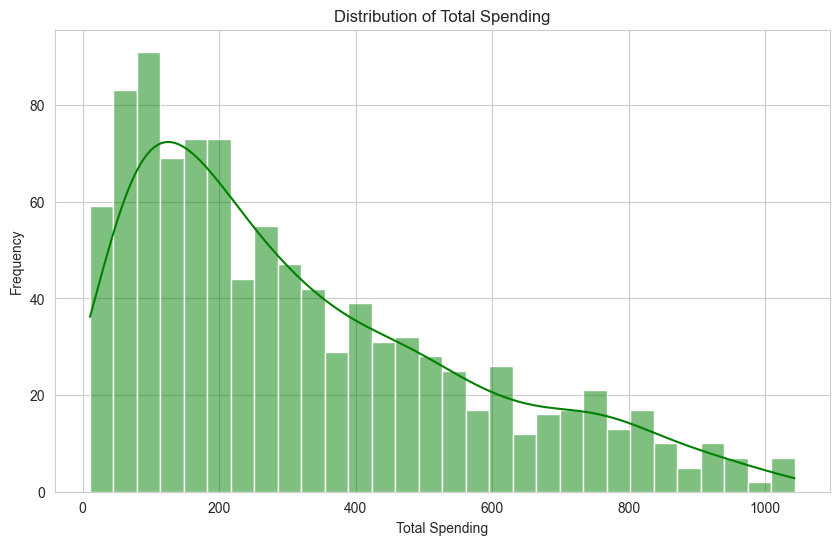

count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: Total, dtype: float64

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(df['Total'], bins=30, kde=True, color= 'green')
plt.title('Distribution of Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


df['Total'].describe()

In [219]:

bins = [0, 124.42, 471.35, df['Total'].max()]
labels = ['Low', 'Medium', 'High']


df['Customer Segment'] = pd.cut(df['Total'], bins=bins, labels=labels)


segment_distribution = df['Customer Segment'].value_counts(normalize=True)
segment_distribution

Customer Segment
Medium    0.50
Low       0.25
High      0.25
Name: proportion, dtype: float64

Try 1

In [220]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


numeric_features = ['Unit price', 'Quantity', 'Tax 5%',
                    'cogs', 'gross margin percentage', 'gross income', 'Rating']
categorical_features = ['Branch', 'City',
                        'Customer type', 'Gender', 'Product line', 'Payment']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])


model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier())])


X = df.drop(['Customer Segment', 'Invoice ID',
            'Date', 'Time', 'Total'], axis=1)
y = df['Customer Segment']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


model.fit(X_train, y_train)


accuracy = model.score(X_test, y_test)
cross_val_accuracy = cross_val_score(model, X, y, cv=5).mean()

accuracy, cross_val_accuracy

(1.0, 0.999)

Try 2

In [221]:

updated_numeric_features = ['Unit price',
                            'Quantity', 'gross margin percentage', 'Rating']
updated_categorical_features = [
    'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']


updated_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), updated_numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), updated_categorical_features)])


updated_model = Pipeline(steps=[('preprocessor', updated_preprocessor),
                                ('classifier', RandomForestClassifier())])


X_updated = df.drop(['Customer Segment', 'Invoice ID', 'Date',
                    'Time', 'Total', 'Tax 5%', 'cogs', 'gross income'], axis=1)


updated_model.fit(X_train, y_train)


updated_accuracy = updated_model.score(X_test, y_test)
updated_cross_val_accuracy = cross_val_score(
    updated_model, X_updated, y, cv=5).mean()

updated_accuracy, updated_cross_val_accuracy

(0.885, 0.857)

REGRESSION 

In [222]:

df_sales = pd.read_csv(r'C:\datasets\supermarketsales.csv')

numeric_columns = df_sales.select_dtypes(include=['number']).columns
df_numeric = df_sales[numeric_columns]

correlation_matrix = df_numeric.corr()

correlation_matrix

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


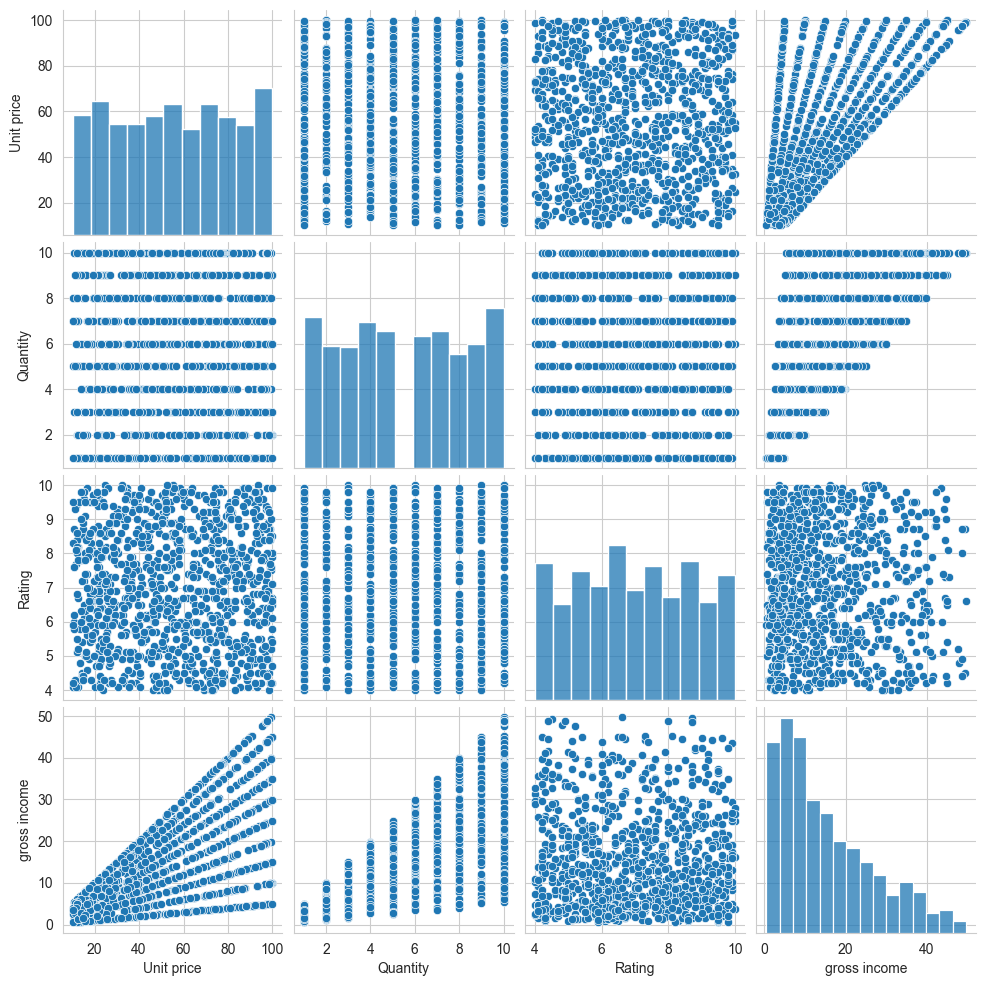

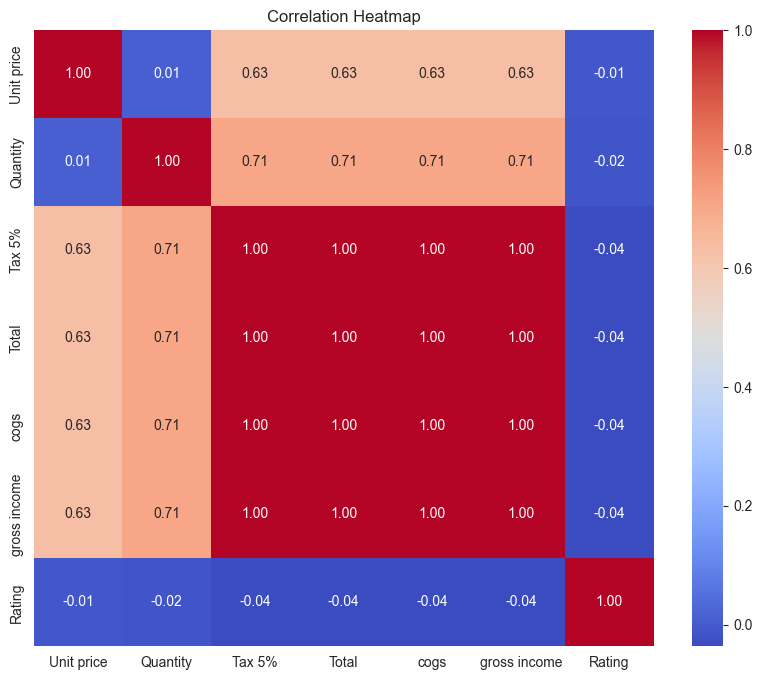

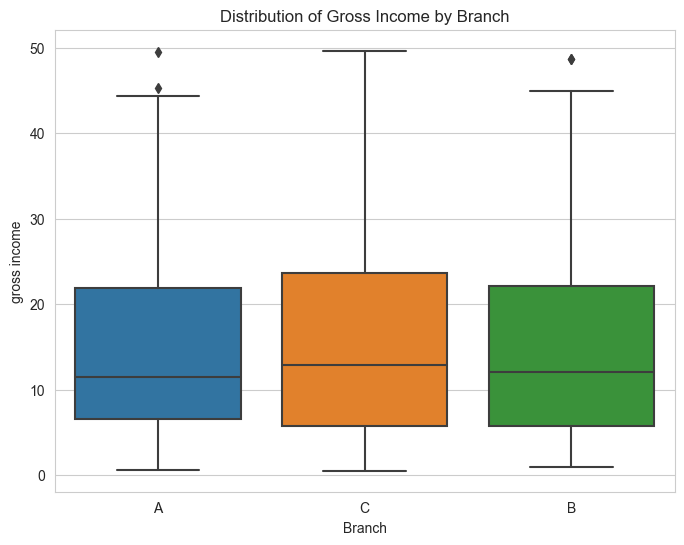

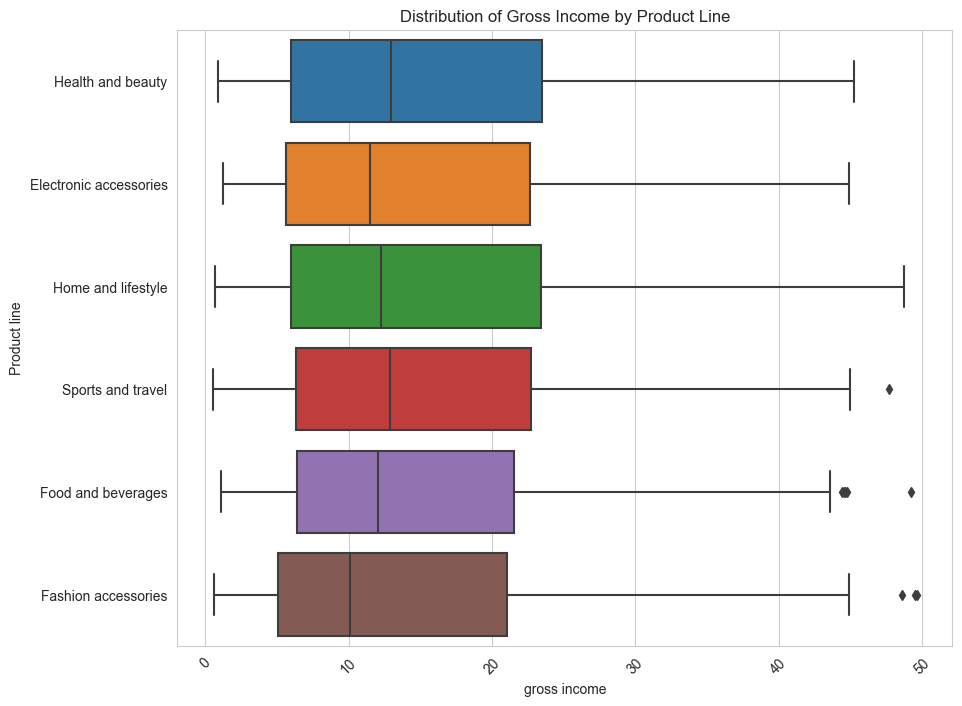

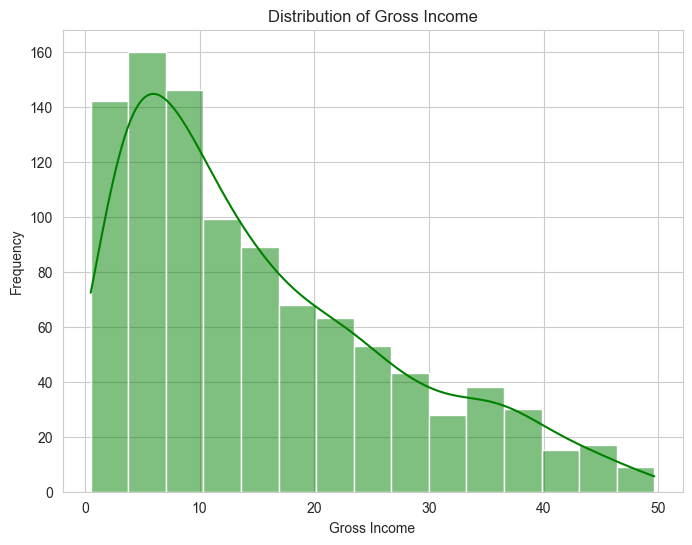

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")


sns.pairplot(df_sales[['Unit price', 'Quantity', 'Rating', 'gross income']])
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df_sales[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs',
            'gross income', 'Rating']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Branch', y='gross income', data=df_sales)
plt.title('Distribution of Gross Income by Branch')
plt.show()


plt.figure(figsize=(10, 8))
sns.boxplot(x='gross income', y='Product line', data=df_sales)
plt.title('Distribution of Gross Income by Product Line')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df_sales['gross income'], kde=True, color='green')
plt.title('Distribution of Gross Income')
plt.xlabel('Gross Income')
plt.ylabel('Frequency')
plt.show()

In [224]:
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore', category=UserWarning)


data = pd.read_csv(r'C:\datasets\supermarketsales.csv')
df_sales = pd.DataFrame(data)


numerical_cols = ['Unit price', 'Quantity',  'Rating']


scaler = StandardScaler()
df_sales[numerical_cols] = scaler.fit_transform(df_sales[numerical_cols])

# print(df_sales[numerical_cols])
# print(df_sales)

X = df_sales[numerical_cols]  # Features
y = df_sales['gross income']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print("\n")
print(r2)


input_data = pd.DataFrame({
    'Unit price': [15.28],
    'Quantity': [5],
    'Rating': [9.6]
}, columns=['Unit price', 'Quantity', 'Rating'])

input_data_scaled = scaler.transform(input_data)
predicted_gross_income = model.predict(input_data_scaled)
print(predicted_gross_income[0])

14.05738916231476


0.9047125222256868
2.4077730444773096


OUTLIER DECTECTION

In [225]:
from scipy.stats import ttest_ind

branch_A = df_sales[df_sales['Branch'] == 'A']['gross income']
branch_B = df_sales[df_sales['Branch'] == 'B']['gross income']

t_stat, p_val = ttest_ind(branch_A, branch_B)

print("T-Statistic:", t_stat)
print("P-value:", p_val)

T-Statistic: -0.41108384262703734
P-value: 0.6811425061880398


In [226]:
from scipy import stats
from scipy.stats import ttest_ind


branch_A = df_sales[df_sales['Branch'] == 'A']['gross income']

branch_B = df_sales[df_sales['Branch'] == 'B']['gross income']


normality_A = stats.shapiro(branch_A)

normality_B = stats.shapiro(branch_B)

t_stat, p_val = ttest_ind(branch_A, branch_B, equal_var=False)

normality_A, normality_B, t_stat, p_val

(ShapiroResult(statistic=0.9122300148010254, pvalue=3.538334989588998e-13),
 ShapiroResult(statistic=0.9022485017776489, pvalue=8.284815704567156e-14),
 -0.4108605605272649,
 0.6813067847998684)

In [227]:
from scipy.stats import mannwhitneyu

u_stat, p_val_mw = mannwhitneyu(branch_A, branch_B, alternative='two-sided')
u_stat, p_val_mw

(56088.0, 0.8888961267789395)

10) Outlier detection

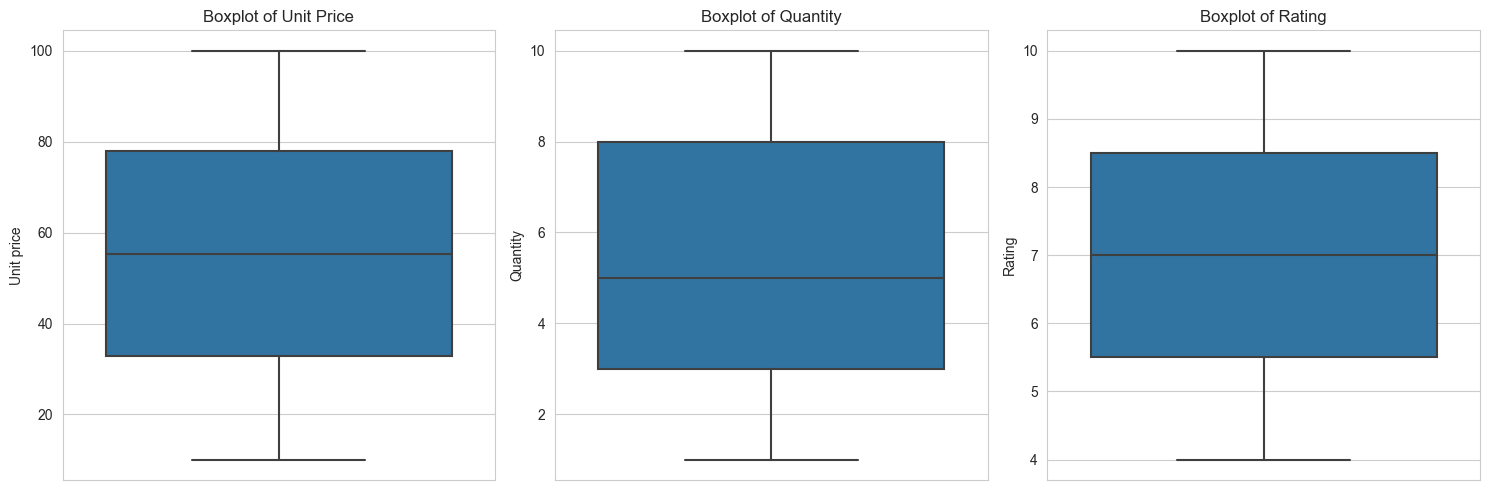

(0, 0, 0)

In [228]:


data = pd.read_csv(r'C:\datasets\supermarketsales.csv')

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['Unit price'])
plt.title('Boxplot of Unit Price')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Quantity'])
plt.title('Boxplot of Quantity')


plt.subplot(1, 3, 3)
sns.boxplot(y=df['Rating'])
plt.title('Boxplot of Rating')

plt.tight_layout()
plt.show()



def detect_outliers(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) |
                    (data[feature] > upper_bound)]
    return outliers


outliers_unit_price = detect_outliers(df, 'Unit price')
outliers_quantity = detect_outliers(df, 'Quantity')
outliers_rating = detect_outliers(df, 'Rating')

(outliers_unit_price.shape[0],
 outliers_quantity.shape[0], outliers_rating.shape[0])

The boxplot visualizations for 'Unit price', 'Quantity', and 'Rating' do not reveal any obvious outliers, as there are no data points that significantly deviate from the rest. This observation is confirmed by the IQR method, which did not identify any outliers in these features (0 outliers for each).

Tests

In [229]:
from scipy.stats import shapiro, f_oneway, kruskal, pearsonr, spearmanr

normality_tests = {feature: shapiro(df[feature]) for feature in [
    'Unit price', 'Quantity', 'Rating']}

normality_results = {feature: {
    "Statistic": result[0], "p-value": result[1]} for feature, result in normality_tests.items()}
normality_results

{'Unit price': {'Statistic': 0.9518819451332092,
  'p-value': 1.4402478396524193e-17},
 'Quantity': {'Statistic': 0.9325783848762512,
  'p-value': 7.962700685964001e-21},
 'Rating': {'Statistic': 0.9582011103630066,
  'p-value': 2.6884717219755126e-16}}

In [230]:

kw_tests = {feature: kruskal(*[group[feature].values for name, group in df.groupby('Customer Segment')])
            for feature in ['Unit price', 'Quantity', 'Rating']}


kw_results = {feature: {
    "Statistic": result[0], "p-value": result[1]} for feature, result in kw_tests.items()}


spearman_corr, spearman_p_value = spearmanr(df['Quantity'], df['gross income'])


kw_results['Correlation between Quantity and gross income'] = {
    "Correlation": spearman_corr, "p-value": spearman_p_value}
kw_results

{'Unit price': {'Statistic': 326.5456834554291,
  'p-value': 1.2345417824331075e-71},
 'Quantity': {'Statistic': 474.90331387237376,
  'p-value': 7.517192535375664e-104},
 'Rating': {'Statistic': 6.306515722753785, 'p-value': 0.04271274774021624},
 'Correlation between Quantity and gross income': {'Correlation': 0.735265306019586,
  'p-value': 9.15480079174248e-171}}

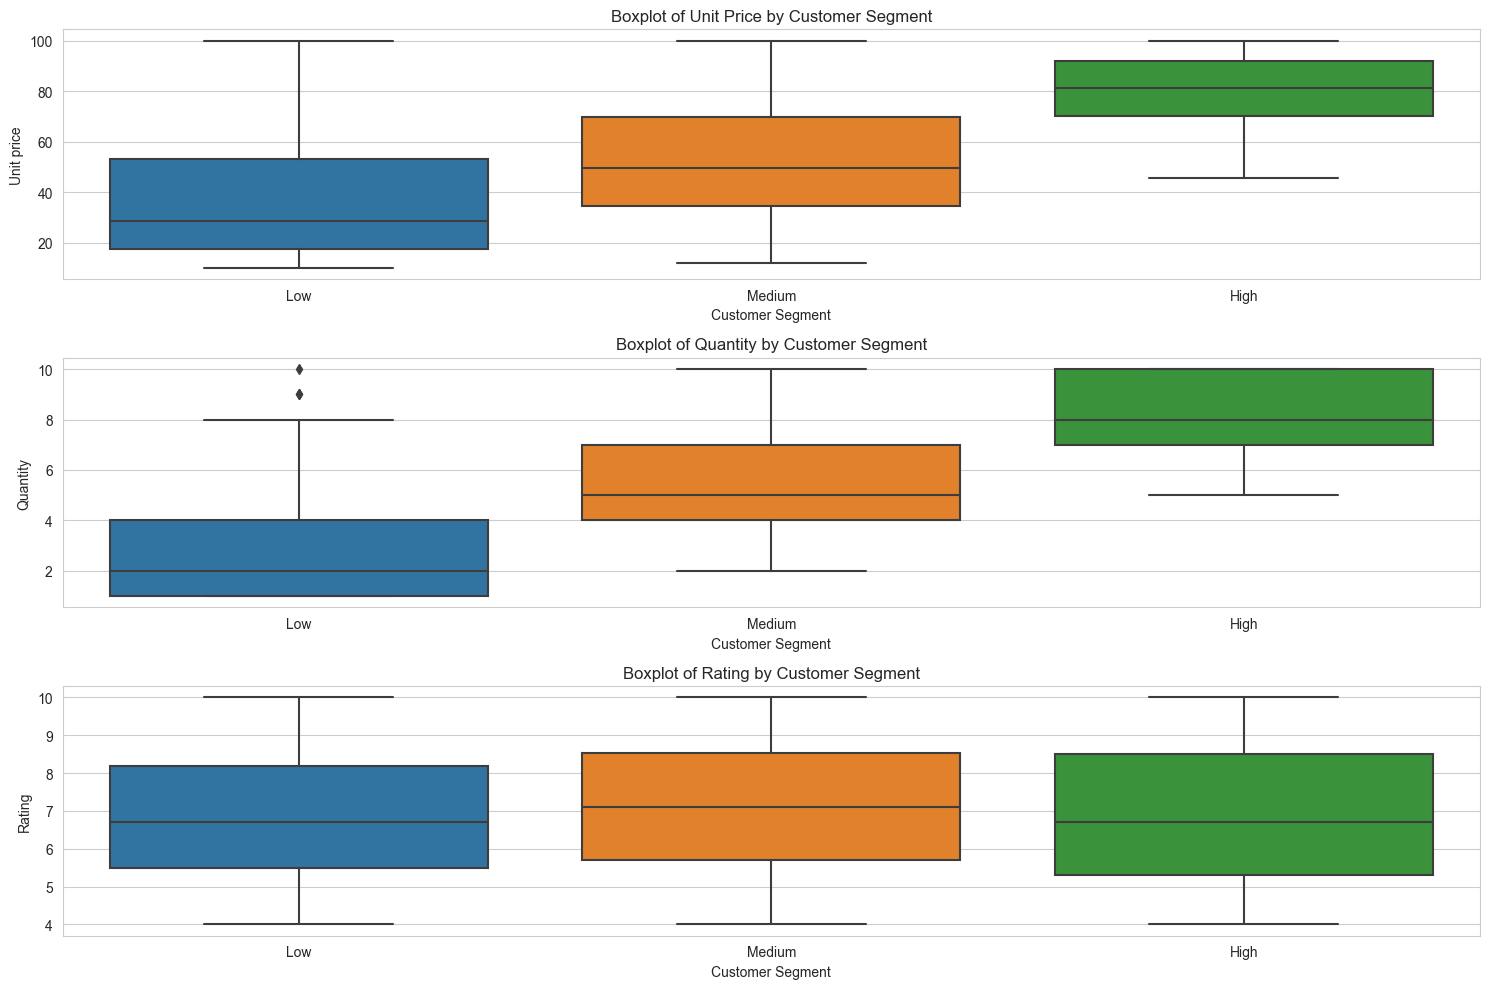

{'High': {'Unit price': 0, 'Quantity': 0, 'Rating': 0},
 'Low': {'Unit price': 0, 'Quantity': 3, 'Rating': 0},
 'Medium': {'Unit price': 0, 'Quantity': 0, 'Rating': 0}}

In [231]:

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
sns.boxplot(x='Customer Segment', y='Unit price', data=df)
plt.title('Boxplot of Unit Price by Customer Segment')


plt.subplot(3, 1, 2)
sns.boxplot(x='Customer Segment', y='Quantity', data=df)
plt.title('Boxplot of Quantity by Customer Segment')


plt.subplot(3, 1, 3)
sns.boxplot(x='Customer Segment', y='Rating', data=df)
plt.title('Boxplot of Rating by Customer Segment')

plt.tight_layout()
plt.show()



def detect_segment_outliers(segment, feature):
    segment_data = df[df['Customer Segment'] == segment]
    Q1 = segment_data[feature].quantile(0.25)
    Q3 = segment_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = segment_data[(segment_data[feature] < lower_bound) | (
        segment_data[feature] > upper_bound)]
    return outliers



outliers_by_segment = {
    segment: {
        'Unit price': detect_segment_outliers(segment, 'Unit price').shape[0],
        'Quantity': detect_segment_outliers(segment, 'Quantity').shape[0],
        'Rating': detect_segment_outliers(segment, 'Rating').shape[0]
    } for segment in df['Customer Segment'].unique()
}

outliers_by_segment

In [232]:

kw_test_spending = kruskal(
    *[group['Total'].values for name, group in df.groupby('Customer Segment')])

male_spending = df[df['Gender'] == 'Male']['Total']
female_spending = df[df['Gender'] == 'Female']['Total']
mw_test_gender = mannwhitneyu(male_spending, female_spending)

spearman_corr_quantity_rating = spearmanr(df['Quantity'], df['Rating'])

hypothesis_test_results = {
    "Spending Across Customer Segments": {"Statistic": kw_test_spending[0], "p-value": kw_test_spending[1]},
    "Gender-Based Differences in Spending": {"Statistic": mw_test_gender[0], "p-value": mw_test_gender[1]},
    "Correlation Between Quantity and Rating": {"Correlation": spearman_corr_quantity_rating[0], "p-value": spearman_corr_quantity_rating[1]}
}

hypothesis_test_results

{'Spending Across Customer Segments': {'Statistic': 842.9071434815719,
  'p-value': 9.226551592739907e-184},
 'Gender-Based Differences in Spending': {'Statistic': 117501.5,
  'p-value': 0.10063092249137542},
 'Correlation Between Quantity and Rating': {'Correlation': -0.015452975128591883,
  'p-value': 0.6254903871032094}}

In [233]:
from scipy.stats import mannwhitneyu

mw_test_gender = mannwhitneyu(male_spending, female_spending)

hypothesis_test_results = {
    "Spending Across Customer Segments": {"Statistic": kw_test_spending[0], "p-value": kw_test_spending[1]},
    "Gender-Based Differences in Spending": {"Statistic": mw_test_gender[0], "p-value": mw_test_gender[1]},
    "Correlation Between Quantity and Rating": {"Correlation": spearman_corr_quantity_rating[0], "p-value": spearman_corr_quantity_rating[1]}
}

hypothesis_test_results

{'Spending Across Customer Segments': {'Statistic': 842.9071434815719,
  'p-value': 9.226551592739907e-184},
 'Gender-Based Differences in Spending': {'Statistic': 117501.5,
  'p-value': 0.10063092249137542},
 'Correlation Between Quantity and Rating': {'Correlation': -0.015452975128591883,
  'p-value': 0.6254903871032094}}